In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Understanding the Dataset Structure

In [ ]:
# Load the CSV file into a DataFrame
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')
df_goodreads.head()

,ID,Author,Title,URL,SeriesName,Summary,Genres,Score,RatingsCount,ReviewsCount,Pages,PublishedDate,Popularity_ReadingNow,Popularity_Wishlisted
0,35053870,sarina bowen,brooklynaire,https://www.goodreads.com/book/show/35053870-b...,Brooklyn Bruisers #4,"You’d think a billion dollars, a professional ...","Romance, Sports, Sports Romance, Contemporary,...",4.07,20705,2322,298,2018-02-12,2261,13100
1,28869598,sarina bowen,hard hitter,https://www.goodreads.com/book/show/28869598-h...,Brooklyn Bruisers #2,"He’s a fighter in the rink, but he’s about to ...","Romance, Sports, Sports Romance, Contemporary,...",4.05,10818,1049,336,2017-01-03,495,5907
2,30627346,sarina bowen,pipe dreams,https://www.goodreads.com/book/show/30627346-p...,Brooklyn Bruisers #3,"A goalie has to trust his instincts, even when...","Romance, Sports, Sports Romance, Contemporary,...",3.92,9532,975,336,2017-05-02,348,5180
3,17561022,j. clare,stranded with a billionaire,https://www.goodreads.com/book/show/17561022-s...,Billionaire Boys Club #1,The Billionaire Boys Club is a secret society ...,"Romance, Contemporary Romance, Contemporary, E...",3.82,14878,1009,215,2013-04-16,335,8684
4,43728457,j. clare,beauty and the billionaire,https://www.goodreads.com/book/show/43728457-b...,Dirty Fairy Tales #1,Ruthless Bastard. White Knight. But I just cal...,"Romance, Contemporary, Contemporary Romance, E...",3.85,9954,691,336,2019-01-27,15700,7770


In [ ]:
# Check the shape of the DataFrame
num_rows, num_columns = df_goodreads.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 105 rows and 14 columns.


In [ ]:
# Display data types of each column
print("Data types of each column:\n")
print(df_goodreads.dtypes)

# Check for missing values in each column
print("\nNumber of missing values in each column:\n")
print(df_goodreads.isnull().sum())

Data types of each column:

ID                         int64
Author                    object
Title                     object
URL                       object
SeriesName                object
Summary                   object
Genres                    object
Score                    float64
RatingsCount               int64
ReviewsCount               int64
Pages                      int64
PublishedDate             object
Popularity_ReadingNow      int64
Popularity_Wishlisted      int64
dtype: object

Number of missing values in each column:

ID                       0
Author                   0
Title                    0
URL                      0
SeriesName               0
Summary                  0
Genres                   0
Score                    0
RatingsCount             0
ReviewsCount             0
Pages                    0
PublishedDate            0
Popularity_ReadingNow    0
Popularity_Wishlisted    0
dtype: int64


# 2. Descriptive Statistics of Numerical Variables

In [ ]:
import pandas as pd

# Load the dataset
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# Convert the 'PublishedDate' column to datetime format and extract only the year
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].dt.year

# Drop rows with missing 'PublishedDate'
df_goodreads.dropna(subset=['PublishedDate'], inplace=True)

# Convert 'PublishedDate' to integer
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].astype(int)

# Specify the numerical columns for descriptive statistics
numerical_columns = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Function to calculate and print descriptive statistics
def descriptive_stats(df, column):
    print(f"Descriptive statistics for {column}:\n")

    # Mean
    mean_value = df[column].mean()
    print(f"Mean: {mean_value}")

    # Median
    median_value = df[column].median()
    print(f"Median: {median_value}")

    # Mode
    mode_value = df[column].mode()[0]  # mode() returns a series, take the first element
    print(f"Mode: {mode_value}")

    # Standard deviation
    std_dev = df[column].std()
    print(f"Standard Deviation: {std_dev}")

    # Range
    range_value = df[column].max() - df[column].min()
    print(f"Range: {range_value}")

    # Minimum
    min_value = df[column].min()
    print(f"Min: {min_value}")

    # Maximum
    max_value = df[column].max()
    print(f"Max: {max_value}")

    # Percentiles
    percentile_25 = df[column].quantile(0.25)
    percentile_50 = df[column].quantile(0.50)
    percentile_75 = df[column].quantile(0.75)

    print(f"25%: {percentile_25}")
    print(f"50% (Median): {percentile_50}")
    print(f"75%: {percentile_75}")

    print("\n" + "="*50 + "\n")

# Loop through the numerical columns and calculate descriptive statistics
for column in numerical_columns:
    descriptive_stats(df_goodreads, column)

Descriptive statistics for Score:

Mean: 3.989333333333333
Median: 4.01
Mode: 4.05
Standard Deviation: 0.21215590542129198
Range: 1.21
Min: 3.26
Max: 4.47
25%: 3.86
50% (Median): 4.01
75%: 4.14


Descriptive statistics for RatingsCount:

Mean: 39644.60952380952
Median: 11558.0
Mode: 146
Standard Deviation: 105271.49990359134
Range: 929738
Min: 146
Max: 929884
25%: 3227.0
50% (Median): 11558.0
75%: 30630.0


Descriptive statistics for ReviewsCount:

Mean: 3548.209523809524
Median: 975.0
Mode: 49
Standard Deviation: 9898.746074139546
Range: 86559
Min: 25
Max: 86584
25%: 339.0
50% (Median): 975.0
75%: 2474.0


Descriptive statistics for Pages:

Mean: 311.8095238095238
Median: 336.0
Mode: 336
Standard Deviation: 108.28888493623248
Range: 458
Min: 72
Max: 530
25%: 244.0
50% (Median): 336.0
75%: 382.0


Descriptive statistics for Popularity_ReadingNow:

Mean: 4666.07619047619
Median: 1867.0
Mode: 0
Standard Deviation: 7767.0535729887715
Range: 57700
Min: 0
Max: 57700
25%: 436.0
50% (Median):

# Check for Normality with Shapiro-Wilk Test



In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
df_goodreads = pd.read_csv('/content/drive/MyDrive/cleaned_goodreads_dataset - cleaned_goodreads_dataset.csv')

# Convert the 'PublishedDate' column to datetime format and extract only the year
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].dt.year

# Drop rows with missing 'PublishedDate'
df_goodreads.dropna(subset=['PublishedDate'], inplace=True)

# Convert 'PublishedDate' to integer
df_goodreads['PublishedDate'] = df_goodreads['PublishedDate'].astype(int)

# Specify the numerical columns for the Shapiro-Wilk normality test
numerical_columns = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Function to perform the Shapiro-Wilk normality test
def check_normality(df, column):
    stat, p_value = shapiro(df[column].dropna())  # Shapiro test ignores missing values
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p_value}")

    # Interpret the result
    if p_value > 0.05:
        print(f"The data in {column} looks normally distributed (fail to reject H0).\n")
    else:
        print(f"The data in {column} does not look normally distributed (reject H0).\n")

    print("="*50)

# Loop through the numerical columns and perform Shapiro-Wilk test for normality
for column in numerical_columns:
    check_normality(df_goodreads, column)

Shapiro-Wilk test for Score:
Test statistic: 0.9880443630395445
P-value: 0.475334993632342
The data in Score looks normally distributed (fail to reject H0).

Shapiro-Wilk test for RatingsCount:
Test statistic: 0.34874594643150847
P-value: 1.7155297130560512e-19
The data in RatingsCount does not look normally distributed (reject H0).

Shapiro-Wilk test for ReviewsCount:
Test statistic: 0.3396818188559274
P-value: 1.2977364430606935e-19
The data in ReviewsCount does not look normally distributed (reject H0).

Shapiro-Wilk test for Pages:
Test statistic: 0.9663018562428517
P-value: 0.00897214850017182
The data in Pages does not look normally distributed (reject H0).

Shapiro-Wilk test for Popularity_ReadingNow:
Test statistic: 0.5896019051387433
P-value: 1.1243729112711123e-15
The data in Popularity_ReadingNow does not look normally distributed (reject H0).

Shapiro-Wilk test for Popularity_Wishlisted:
Test statistic: 0.427056013652543
P-value: 2.1805661034243807e-18
The data in Popularit

# Visualization of Distributions

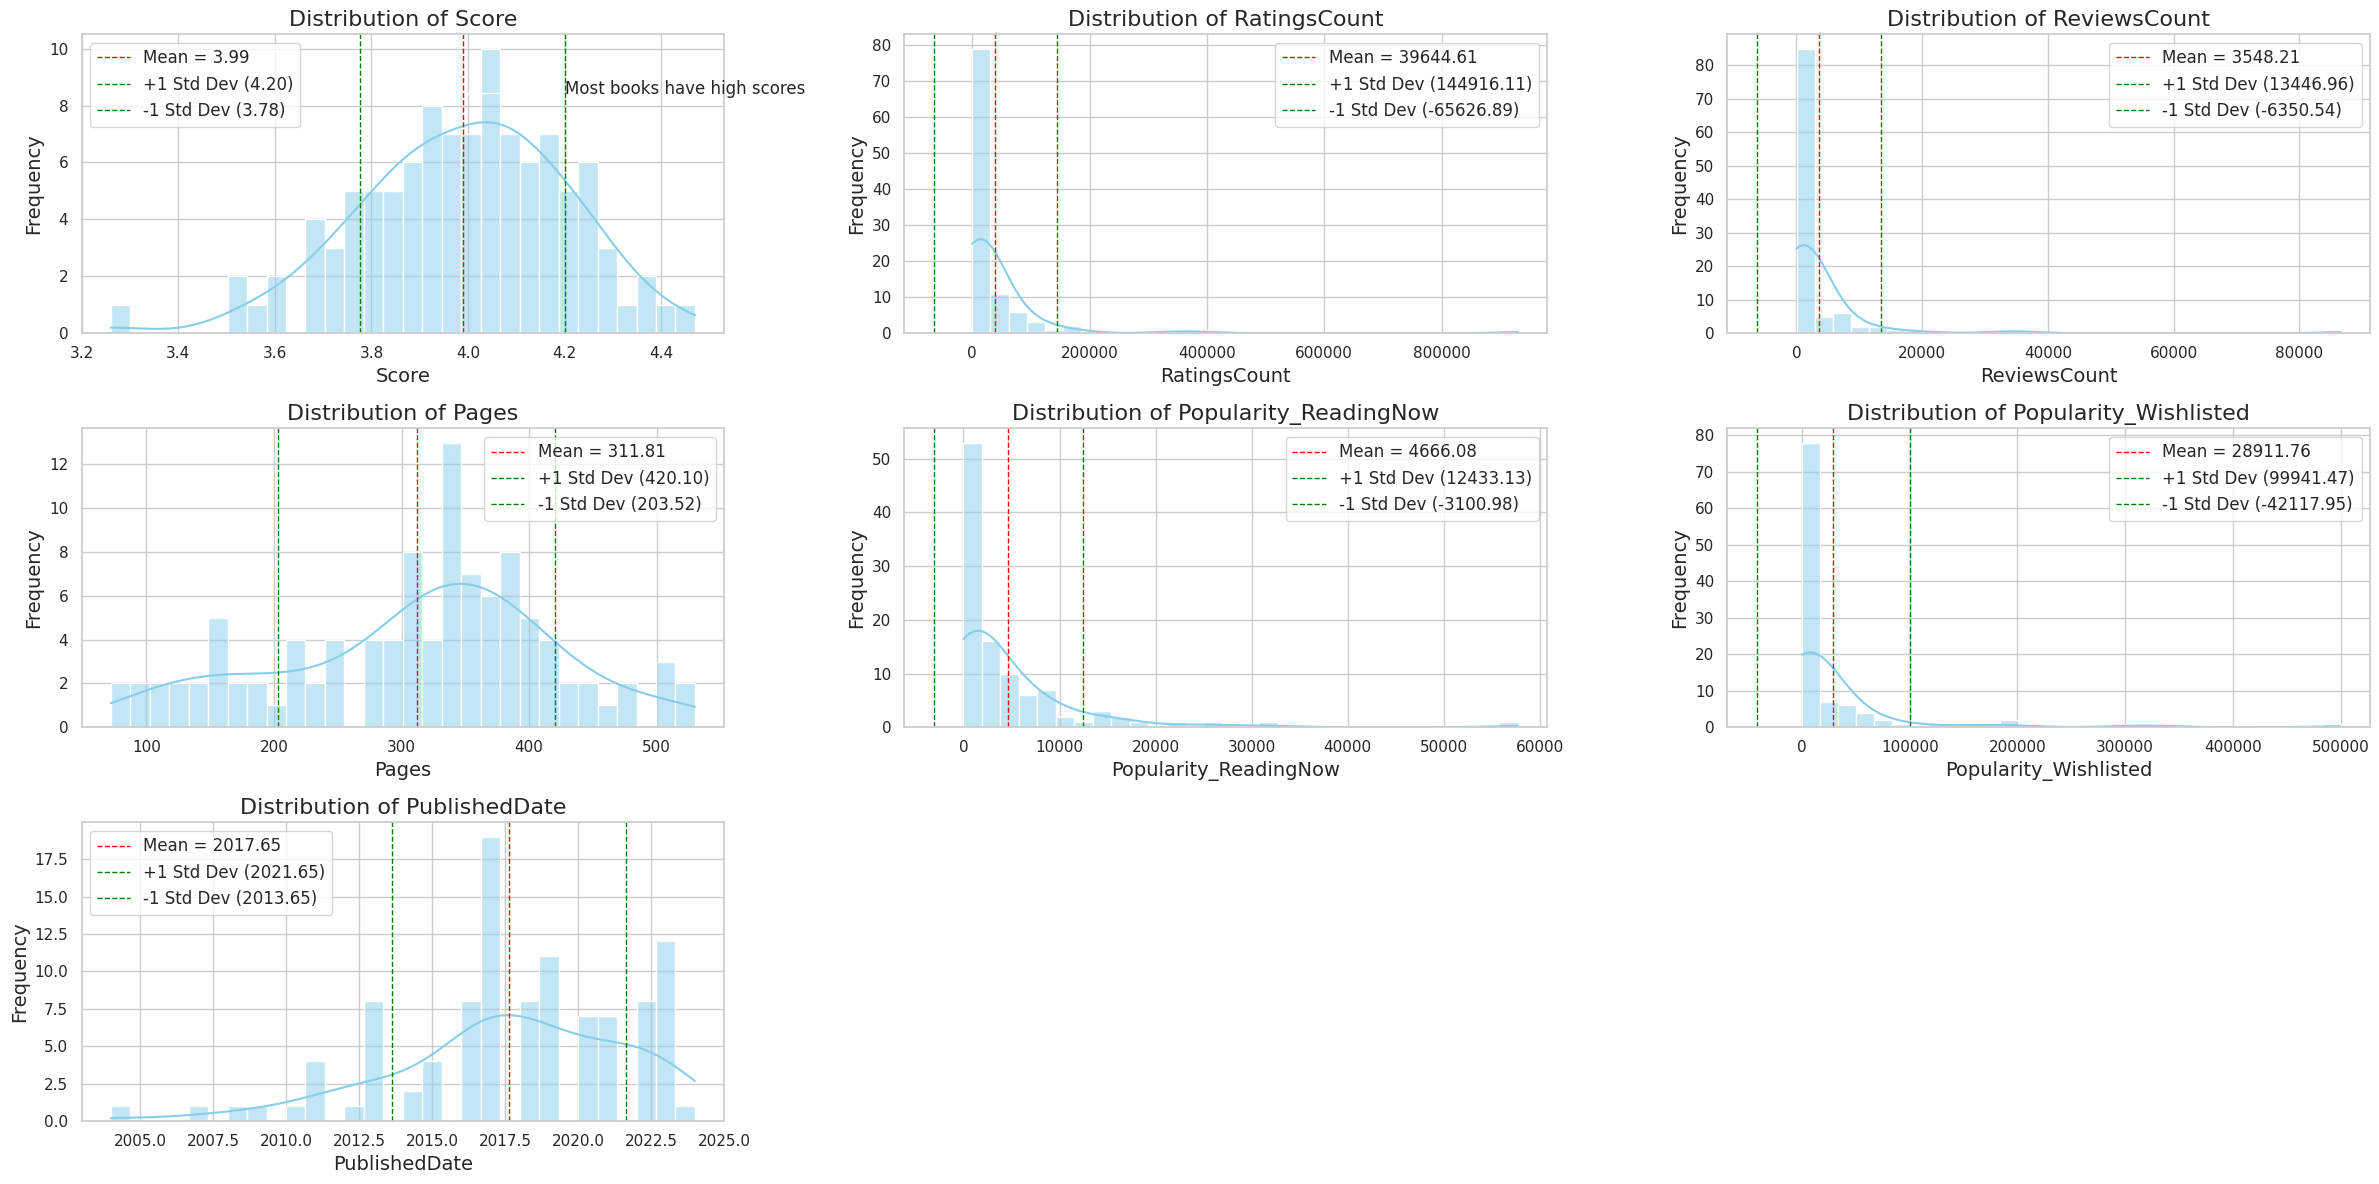

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# Combined Visualization of Numerical Variables (Without Log Transformation)

# Define the list of numerical variables (excluding PublishedYear for now if it's absent)
numerical_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'PublishedDate']

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(24, 12))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten to easily iterate

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]

    # Plot histogram and KDE
    sns.histplot(df_goodreads[var], bins=30, kde=True, color='skyblue', ax=ax)

    # Calculate mean and standard deviation
    mean = df_goodreads[var].mean()
    std = df_goodreads[var].std()

    # Add mean and std lines
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean + std:.2f})')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean - std:.2f})')

    # Set titles and labels
    ax.set_title(f'Distribution of {var}', fontsize=16)
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add legend
    ax.legend(fontsize=12)

    # Optional annotations
    if var == 'Score':
        ax.annotate('Most books have high scores', xy=(mean, ax.get_ylim()[1]*0.8),
                    xytext=(mean + std, ax.get_ylim()[1]*0.8),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the combined figure
plt.show()


<ipython-input-11-0b4d0bef8cf6>:85: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


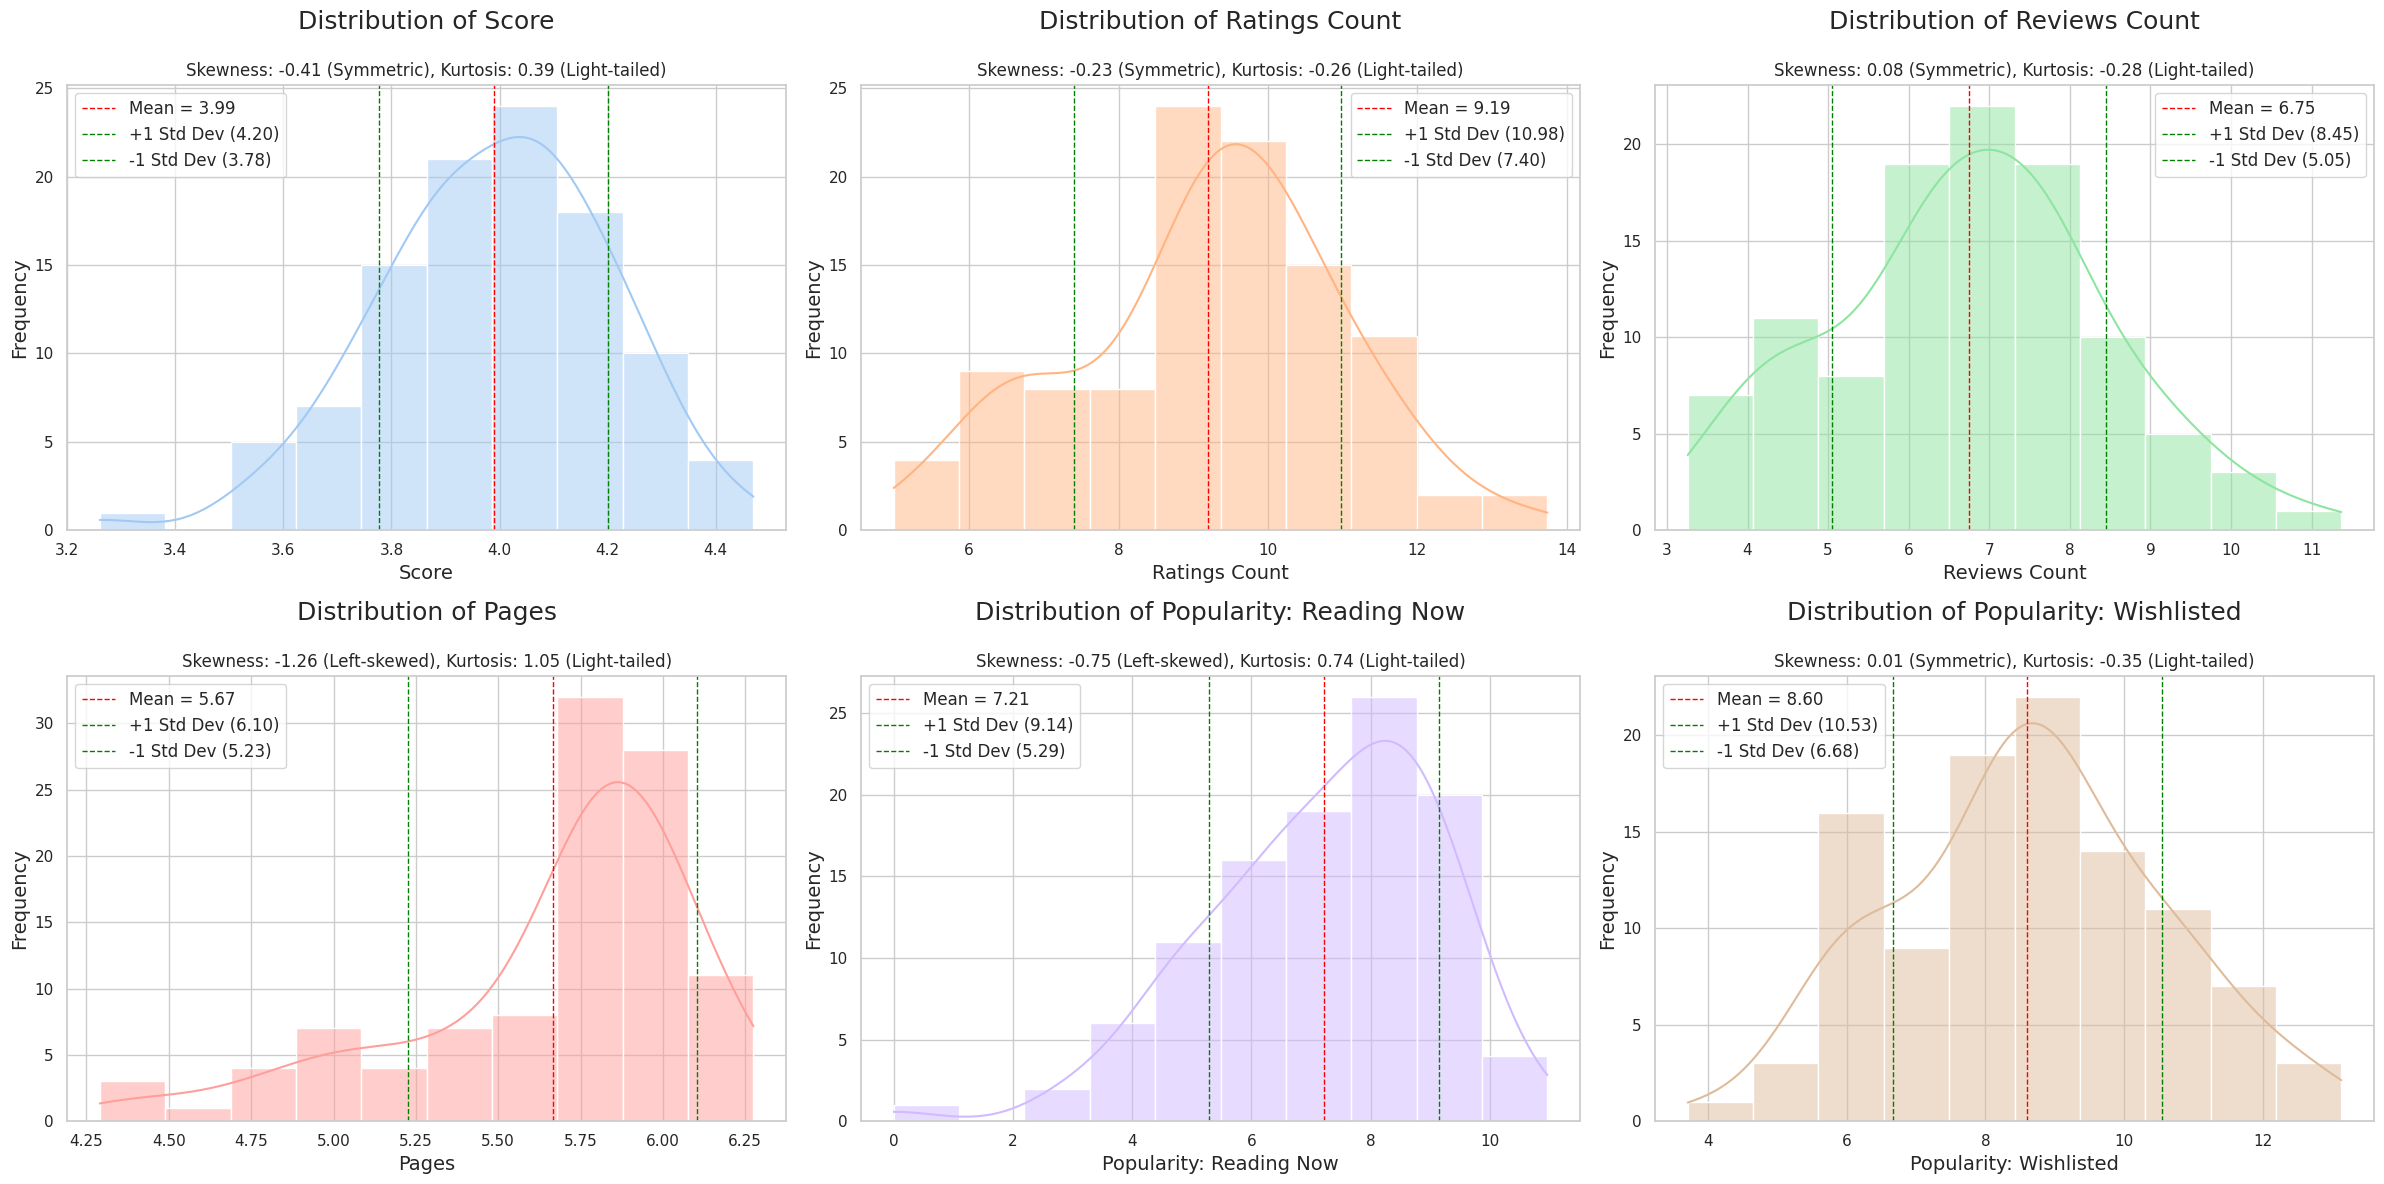

<ipython-input-11-0b4d0bef8cf6>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PublishedDate', data=df_goodreads, palette='pastel')


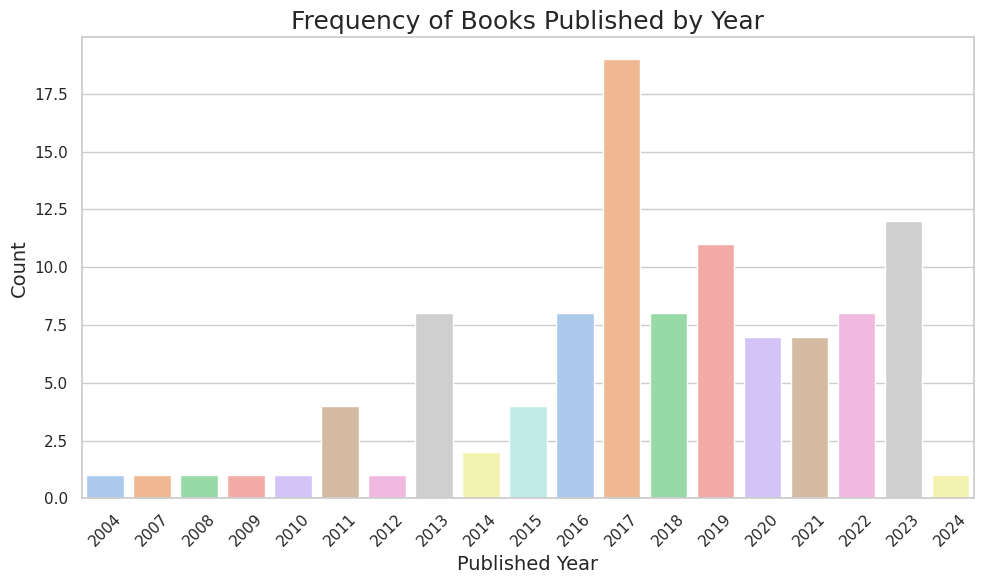

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Define the list of numerical variables (excluding PublishedDate for histogram)
numerical_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Mapping of variable names to more readable names for plotting
name_mapping = {
    'RatingsCount': 'Ratings Count',
    'ReviewsCount': 'Reviews Count',
    'Popularity_ReadingNow': 'Popularity: Reading Now',
    'Popularity_Wishlisted': 'Popularity: Wishlisted',
    'Score': 'Score',
    'Pages': 'Pages',
}

# Define log-transformed variables
log_vars = ['RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted', 'Pages']

# Define pastel colors for each variable
pastel_colors = sns.color_palette("pastel")

# Define the number of plots
num_plots = len(numerical_vars)
cols = 3  # Number of columns
rows = num_plots // cols + int(num_plots % cols > 0)  # Calculate required rows

# Create subplots for numerical variables
fig, axes = plt.subplots(rows, cols, figsize=(24, 12), constrained_layout=True)  # Adjust layout with constrained_layout=True
axes = axes.flatten()

for idx, var in enumerate(numerical_vars):
    ax = axes[idx]

    # Apply log transformation to skewed variables, exclude PublishedDate from log transformation
    if var in log_vars:
        data = np.log1p(df_goodreads[var])
    else:
        data = df_goodreads[var]

    # Get the display name for the variable
    title_var = name_mapping[var]

    # Calculate dynamic binning
    bin_count = int(np.sqrt(len(data)))  # Dynamic binning based on the size of the data

    # Plot histogram and KDE with distinct pastel colors
    sns.histplot(data, bins=bin_count, kde=True, color=pastel_colors[idx % len(pastel_colors)], ax=ax)

    # Calculate mean, standard deviation, skewness, and kurtosis
    mean = data.mean()
    std = data.std()
    skewness = skew(data)
    kurt = kurtosis(data)

    # Add mean and std lines
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev ({mean + std:.2f})')
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev ({mean - std:.2f})')

    # Set titles and labels with skewness and kurtosis annotations
    skewness_annotation = "Left-skewed" if skewness < -0.5 else ("Right-skewed" if skewness > 0.5 else "Symmetric")
    kurtosis_annotation = "Heavy-tailed" if kurt > 3 else "Light-tailed"

    # Set the main title font larger than the annotation font
    ax.set_title(f'Distribution of {title_var}', fontsize=18, pad=40)  # Padding for title

    # Lower the annotation closer to the plot and adjust the font size
    ax.text(0.5, 1.03, f'Skewness: {skewness:.2f} ({skewness_annotation}), Kurtosis: {kurt:.2f} ({kurtosis_annotation})',
            transform=ax.transAxes, fontsize=12, ha='center', va='center')  # Lowered placement closer to the plot

    ax.set_xlabel(title_var, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Add legend
    ax.legend(fontsize=12, loc='best')

# Remove any empty subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout using tight layout and constrained layout
plt.tight_layout()
plt.show()

# Plot for 'PublishedDate'
plt.figure(figsize=(10, 6))
sns.countplot(x='PublishedDate', data=df_goodreads, palette='pastel')
plt.title('Frequency of Books Published by Year', fontsize=18)  # Main title larger for bar plot
plt.xlabel('Published Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-d0ed870ec225>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,
<ipython-input-12-d0ed870ec225>:28: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,


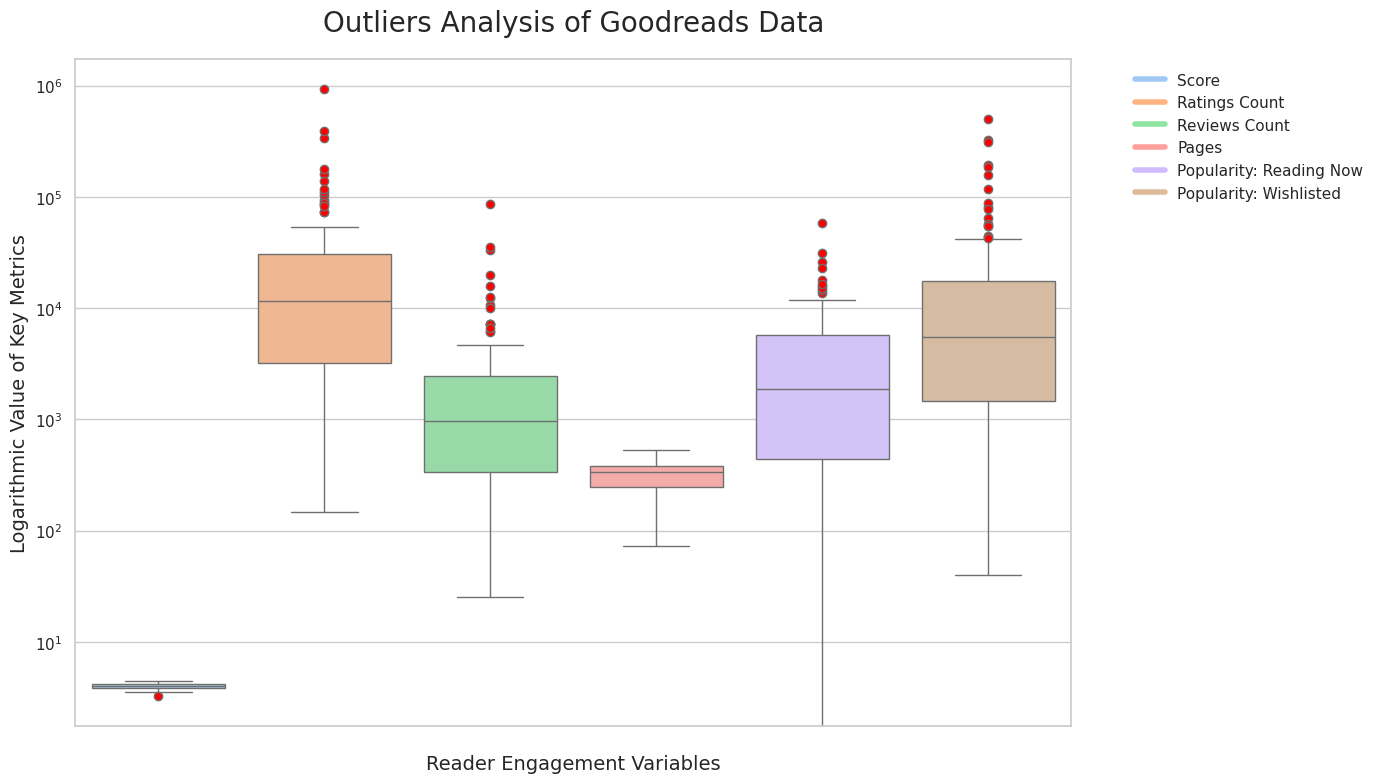

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapping of variable names to more readable names for plotting
name_mapping = {
    'RatingsCount': 'Ratings Count',
    'ReviewsCount': 'Reviews Count',
    'Popularity_ReadingNow': 'Popularity: Reading Now',
    'Popularity_Wishlisted': 'Popularity: Wishlisted',
    'Score': 'Score',
    'Pages': 'Pages',
}

# List of numerical variables to analyze for outliers
outlier_vars = ['Score', 'RatingsCount', 'ReviewsCount', 'Pages', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Assuming df_goodreads contains the dataset and mapping to readable names
df_melted = df_goodreads[outlier_vars].rename(columns=name_mapping).melt(var_name='Variable', value_name='Value')

# Set up pastel color palette
pastel_palette = sns.color_palette("pastel")

# Set up the matplotlib figure for a single plot
plt.figure(figsize=(14, 8))

# Create a boxplot with seaborn
sns.boxplot(x='Variable', y='Value', data=df_melted, palette=pastel_palette,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))

# Adjust the y-axis to use a log scale
plt.yscale('log')

# Title moved slightly higher for clarity and font adjusted
plt.title('Outliers Analysis of Goodreads Data', fontsize=20, pad=20)

# Modify the x-axis label to be more descriptive and adjust its position (slightly lower)
plt.xlabel('Reader Engagement Variables', fontsize=14, labelpad=20)

# Modify the y-axis label for clarity
plt.ylabel('Logarithmic Value of Key Metrics', fontsize=14)

# Remove the x-axis tick labels for each variable
plt.xticks([])

# Add gridlines
plt.grid(True)

# Create a legend with color coding but without the title
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in pastel_palette]
labels = [name_mapping[var] for var in outlier_vars]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Show the final plot
plt.tight_layout()
plt.show()

# Correlation Analysis
**Objective:**

This analysis investigates the relationships between key numerical variables in the Goodreads dataset related to reader engagement and satisfaction with romance novels. Specifically, it aims to examine correlations between book ratings, reviews, and popularity metrics to identify factors that might influence reader engagement (as measured by ratings and reviews) and popularity (as measured by the number of users reading or wishlisting the book).

**Correlation Analysis:**

Pearson’s correlation was applied for relationships involving the normally distributed variable score, and Spearman’s rank correlation was applied for relationships involving other variables, due to their non-normal distribution. Bonferroni correction was applied to adjust for multiple comparisons, ensuring a stringent control over Type I errors.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
from sklearn.utils import resample
import statsmodels.stats.multitest as multitest

# Load the dataset (assuming it's already loaded in df_goodreads)
# Variables for analysis
variables = ['Score', 'RatingsCount', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Log transformation for skewed variables
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
df_goodreads['Log_ReviewsCount'] = np.log1p(df_goodreads['ReviewsCount'])
df_goodreads['Log_Popularity_Wishlisted'] = np.log1p(df_goodreads['Popularity_Wishlisted'])

# New dataframe with transformed variables
df_transformed = df_goodreads[['Score', 'Log_RatingsCount', 'Log_ReviewsCount', 'Popularity_ReadingNow', 'Log_Popularity_Wishlisted']]

# Method to calculate confidence intervals using bootstrapping
def bootstrap_ci(data, func, n_bootstrap=1000, alpha=0.05):
    bootstrapped_stats = []
    for _ in range(n_bootstrap):
        sample = resample(data, replace=True, random_state=None)
        bootstrapped_stats.append(func(sample))
    lower = np.percentile(bootstrapped_stats, 100 * (alpha / 2))
    upper = np.percentile(bootstrapped_stats, 100 * (1 - alpha / 2))
    return lower, upper

# List to store correlation results
correlation_results = []
p_values = []

# Calculate correlations
for i, col1 in enumerate(df_transformed.columns):
    for j, col2 in enumerate(df_transformed.columns):
        if i < j:
            # Use Pearson correlation for 'Score' and Spearman for others
            if col1 == 'Score' or col2 == 'Score':
                corr, p_value = pearsonr(df_transformed[col1], df_transformed[col2])
                corr_type = 'Pearson'
            else:
                corr, p_value = spearmanr(df_transformed[col1], df_transformed[col2])
                corr_type = 'Spearman'

            # Bootstrap confidence interval
            data_for_ci = df_transformed[[col1, col2]].dropna()
            ci_lower, ci_upper = bootstrap_ci(data_for_ci, lambda data: spearmanr(data[col1], data[col2])[0])

            # Append the results
            correlation_results.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Correlation': corr,
                'P-value': p_value,
                'Correlation Type': corr_type,
                'CI Lower': ci_lower,
                'CI Upper': ci_upper
            })
            p_values.append(p_value)

# Apply Bonferroni correction for multiple comparisons
_, corrected_p_values, _, _ = multitest.multipletests(p_values, method='bonferroni')

# Add the corrected p-values to the results
for i, result in enumerate(correlation_results):
    result['Corrected P-value'] = corrected_p_values[i]

# Convert to DataFrame and display results
df_correlation_results = pd.DataFrame(correlation_results)

# Add r^2 to the results
df_correlation_results['Effect Size (r^2)'] = df_correlation_results['Correlation'] ** 2

# Display the correlation results with effect sizes
print(df_correlation_results[['Variable 1', 'Variable 2', 'Correlation', 'Corrected P-value', 'Effect Size (r^2)']])

              Variable 1                 Variable 2  Correlation  \
0                  Score           Log_RatingsCount     0.320862   
1                  Score           Log_ReviewsCount     0.290044   
2                  Score      Popularity_ReadingNow     0.103785   
3                  Score  Log_Popularity_Wishlisted     0.246112   
4       Log_RatingsCount           Log_ReviewsCount     0.972519   
5       Log_RatingsCount      Popularity_ReadingNow     0.744609   
6       Log_RatingsCount  Log_Popularity_Wishlisted     0.879999   
7       Log_ReviewsCount      Popularity_ReadingNow     0.737399   
8       Log_ReviewsCount  Log_Popularity_Wishlisted     0.884323   
9  Popularity_ReadingNow  Log_Popularity_Wishlisted     0.783072   

   Corrected P-value  Effect Size (r^2)  
0       8.462823e-03           0.102952  
1       2.688446e-02           0.084125  
2       1.000000e+00           0.010771  
3       1.138131e-01           0.060571  
4       5.125203e-66           0.945794  

# Visualizing the Results of Correlation Analysis

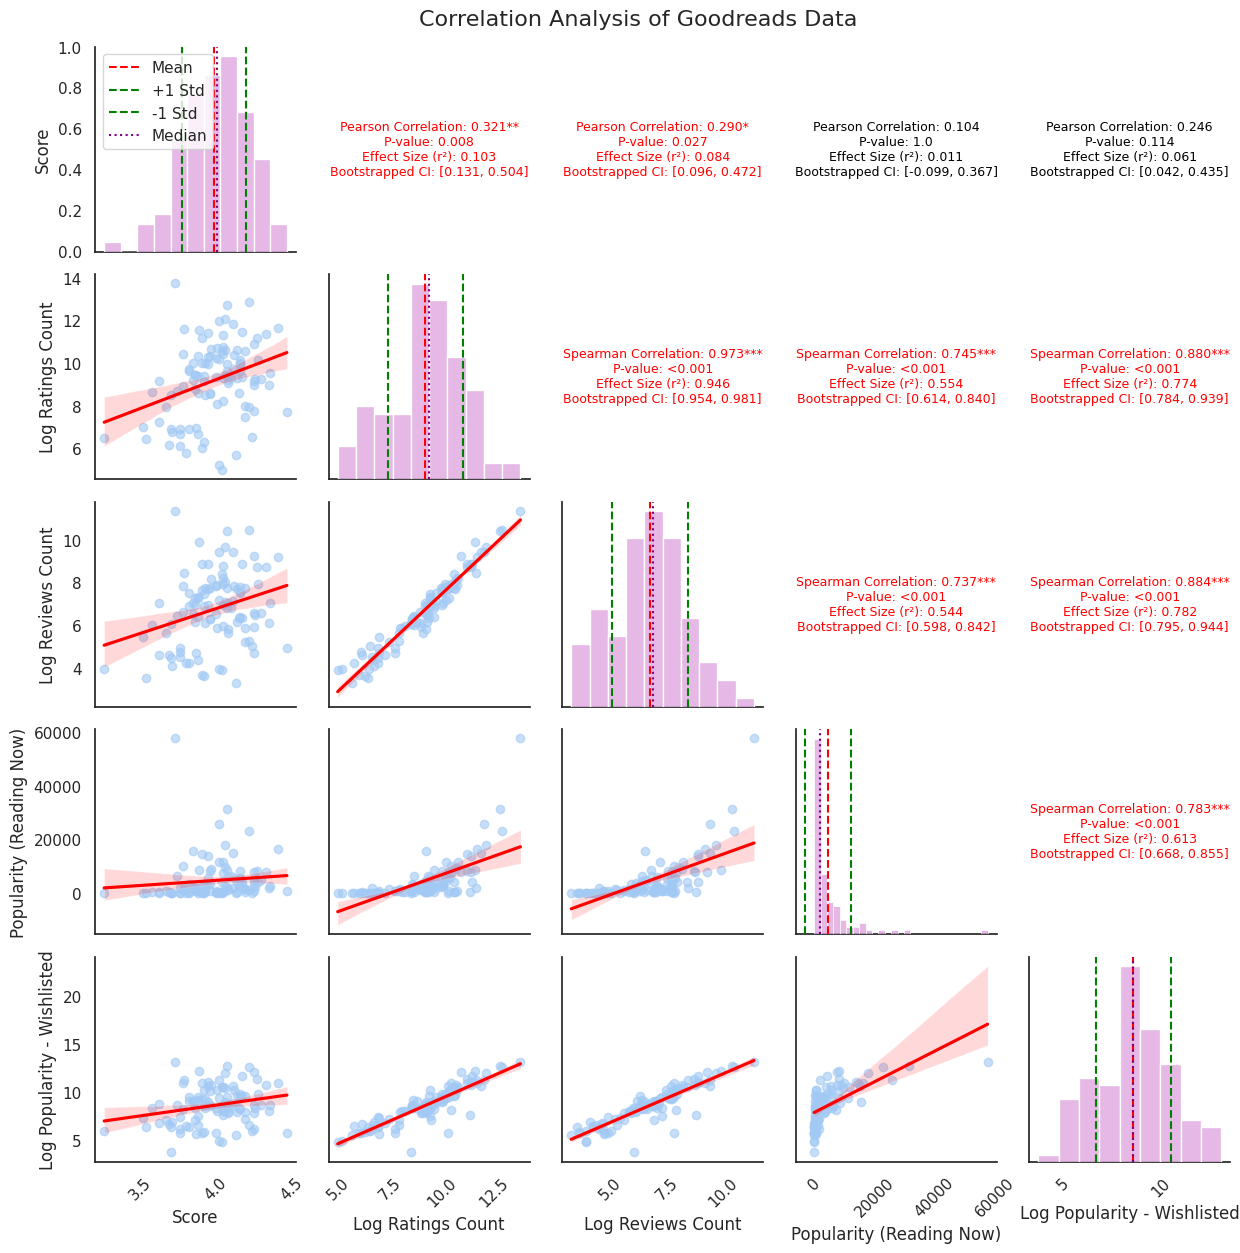

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.utils import resample
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

# Assuming the dataset is already loaded as df_goodreads
# Log transformation for skewed variables
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
df_goodreads['Log_ReviewsCount'] = np.log1p(df_goodreads['ReviewsCount'])
df_goodreads['Log_Popularity_Wishlisted'] = np.log1p(df_goodreads['Popularity_Wishlisted'])

# Rename 'Popularity_ReadingNow' for consistency
df_goodreads.rename(columns={'Popularity_ReadingNow': 'Popularity: Reading Now'}, inplace=True)

# New dataframe with transformed variables
df_transformed = df_goodreads[['Score', 'Log_RatingsCount', 'Log_ReviewsCount', 'Popularity: Reading Now', 'Log_Popularity_Wishlisted']]

# Improved label names for better readability
name_mapping = {
    'Score': 'Score',
    'Log_RatingsCount': 'Log Ratings Count',
    'Log_ReviewsCount': 'Log Reviews Count',
    'Popularity: Reading Now': 'Popularity (Reading Now)',
    'Log_Popularity_Wishlisted': 'Log Popularity - Wishlisted',
}

# List of variables to be used in the plot
plot_variables = [name_mapping.get(var, var) for var in df_transformed.columns]

# Method to calculate confidence intervals using bootstrapping
def bootstrap_ci(data, func, n_bootstrap=1000, alpha=0.05):
    bootstrapped_stats = []
    for _ in range(n_bootstrap):
        sample = resample(data, replace=True)
        bootstrapped_stats.append(func(sample))
    lower = np.percentile(bootstrapped_stats, 100 * (alpha / 2))
    upper = np.percentile(bootstrapped_stats, 100 * (1 - alpha / 2))
    return lower, upper

# List to store correlation results
correlation_results = []
p_values = []

# Calculate correlations
for i, col1 in enumerate(df_transformed.columns):
    for j, col2 in enumerate(df_transformed.columns):
        if i < j:
            # Use Pearson correlation for 'Score' and Spearman for others
            if col1 == 'Score' or col2 == 'Score':
                corr, p_value = pearsonr(df_transformed[col1], df_transformed[col2])
                corr_type = 'Pearson'
            else:
                corr, p_value = spearmanr(df_transformed[col1], df_transformed[col2])
                corr_type = 'Spearman'

            # Bootstrap confidence interval
            data_for_ci = df_transformed[[col1, col2]].dropna()
            ci_lower, ci_upper = bootstrap_ci(
                data_for_ci,
                lambda data: pearsonr(data[col1], data[col2])[0] if corr_type == 'Pearson' else spearmanr(data[col1], data[col2])[0]
            )

            # If p-value < 0.001, set it to "<0.001"
            p_value_display = "<0.001" if p_value < 0.001 else np.round(p_value, 3)

            # Append the results
            correlation_results.append({
                'Variable 1': name_mapping.get(col1, col1),
                'Variable 2': name_mapping.get(col2, col2),
                'Correlation': corr,
                'P-value': p_value_display,  # Display "<0.001" for small p-values
                'Correlation Type': corr_type,
                'CI Lower': ci_lower,
                'CI Upper': ci_upper
            })
            p_values.append(p_value)

# Apply Bonferroni correction for multiple comparisons
_, corrected_p_values, _, _ = multipletests(p_values, method='bonferroni')

# Add the corrected p-values and effect sizes to the results
for i, result in enumerate(correlation_results):
    corrected_p_value_display = "<0.001" if corrected_p_values[i] < 0.001 else np.round(corrected_p_values[i], 3)
    result['Corrected P-value'] = corrected_p_value_display  # Display "<0.001" for small corrected p-values
    result['Effect Size (r²)'] = result['Correlation'] ** 2

# Convert to DataFrame
df_correlation_results = pd.DataFrame(correlation_results)

# Prepare the data for plotting with readable variable names
df_transformed_renamed = df_transformed.rename(columns=name_mapping)

# Create a PairGrid with pastel colors
sns.set(style='white', palette='pastel')
pairgrid = sns.PairGrid(df_transformed_renamed, vars=plot_variables, diag_sharey=False)

# Define a custom function to annotate the plots with statistical information
def annotate_correlation(x, y, **kws):
    var1 = x.name
    var2 = y.name

    # Find the corresponding correlation result
    result = df_correlation_results[
        ((df_correlation_results['Variable 1'] == var1) & (df_correlation_results['Variable 2'] == var2)) |
        ((df_correlation_results['Variable 1'] == var2) & (df_correlation_results['Variable 2'] == var1))
    ]

    if not result.empty:
        result = result.iloc[0]
        corr = result['Correlation']
        p_value = result['Corrected P-value']
        effect_size = result['Effect Size (r²)']
        ci_lower = result['CI Lower']
        ci_upper = result['CI Upper']
        corr_type = result['Correlation Type']

        # Determine significance level
        if p_value == "<0.001" or float(p_value) < 0.001:
            significance = '***'
        elif float(p_value) < 0.01:
            significance = '**'
        elif float(p_value) < 0.05:
            significance = '*'
        else:
            significance = ''

        # Build the annotation text
        annotation = (
            f'{corr_type} Correlation: {corr:.3f}{significance}\n'
            f'P-value: {p_value}\n'
            f'Effect Size (r²): {effect_size:.3f}\n'
            f'Bootstrapped CI: [{ci_lower:.3f}, {ci_upper:.3f}]'
        )

        # Choose color based on significance
        if significance:
            color = 'red'
        else:
            color = 'black'

        # Place the annotation in the center of the plot
        ax = plt.gca()
        ax.annotate(
            annotation,
            xy=(0.5, 0.5),
            xycoords='axes fraction',
            ha='center',
            va='center',
            fontsize=9,
            color=color,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
        )
        # Hide the axes to make the text stand out
        ax.set_axis_off()

# Function to plot scatter plots with regression lines and confidence intervals
def scatter_with_regline(x, y, **kws):
    ax = plt.gca()
    # Determine if Pearson or Spearman correlation is appropriate
    var1 = x.name
    var2 = y.name
    # Use Pearson for 'Score', Spearman for others
    if 'Score' in [var1, var2]:
        sns.regplot(x=x, y=y, ci=95, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ax=ax)
    else:
        # For Spearman, we need to sort the data
        data = pd.DataFrame({var1: x, var2: y}).dropna()
        data_sorted = data.sort_values(by=var1)
        sns.regplot(x=data_sorted[var1], y=data_sorted[var2], ci=95, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}, ax=ax)

# Function to plot histograms with central tendency and std deviation lines
def hist_with_stats(x, **kws):
    ax = plt.gca()
    sns.histplot(x, kde=False, color='plum', ax=ax)  # Use soft violet (plum) color for histograms
    mean = x.mean()
    std = x.std()
    # Plot mean line
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    # Plot standard deviation lines
    ax.axvline(mean + std, color='green', linestyle='--', label='+1 Std')
    ax.axvline(mean - std, color='green', linestyle='--', label='-1 Std')
    # Optionally, plot median
    median = x.median()
    ax.axvline(median, color='purple', linestyle=':', label='Median')
    # Only add a legend in the top-right plot to declutter
    if x.name == plot_variables[0]:
        ax.legend()

# Map the plots
pairgrid.map_lower(scatter_with_regline)
pairgrid.map_upper(annotate_correlation)
pairgrid.map_diag(hist_with_stats)

# Adjust labels and titles
for ax in pairgrid.axes.flatten():
    if ax:
        # Rotate x-axis labels for readability
        for label in ax.get_xticklabels():
            label.set_rotation(45)
        # Rotate y-axis labels for readability
        for label in ax.get_yticklabels():
            label.set_rotation(0)

# Adjust the layout
plt.subplots_adjust(top=0.95)
pairgrid.fig.suptitle('Correlation Analysis of Goodreads Data', fontsize=16)

plt.show()

# Adjusting Scores Using Bayesian Averaging

Bayesian averaging is used to adjust a book’s score by accounting for the number of ratings it has received. This method reduces the bias introduced by books with high scores but few ratings, by pulling scores towards the global average (3.99). The adjustment ensures that books with a low number of ratings do not disproportionately inflate their scores, providing a more reliable assessment.

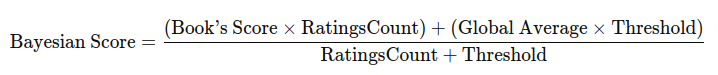

In [ ]:
# Extract relevant columns (Score and RatingsCount) for Bayesian adjustment
numerical_columns = ['Score', 'RatingsCount']
df = df_goodreads[numerical_columns].dropna()  # Remove any rows with missing data

# Check the structure of the dataset to confirm it's ready for analysis
df.describe()

,Score,RatingsCount
count,105.000000,105.000000
mean,3.989333,39644.609524
std,0.212156,105271.499904
min,3.260000,146.000000
25%,3.860000,3227.000000
50%,4.010000,11558.000000
75%,4.140000,30630.000000
max,4.470000,929884.000000


**Calculate Global Average R (Overall Mean Rating)**




In [ ]:
# Calculate the global mean rating (R) for the Bayesian formula
global_mean_rating = df['Score'].mean()

# Output the global mean rating
print(f"Global Mean Rating (R): {global_mean_rating}")

Global Mean Rating (R): 3.989333333333333


**Calculate the Median or Chosen Prior C (Number of Voters)**

In [ ]:
# Calculate the median number of ratings (C), since the distribution of voters is right-skewed
prior_C = df['RatingsCount'].median()

# Output the chosen prior (C)
print(f"Chosen Prior (C): {prior_C}")

Chosen Prior (C): 11558.0


**Apply Bayesian Average Formula**

In [ ]:
# Define the function to compute Bayesian Average for each item
def bayesian_average(row, global_mean_rating, prior_C):
    v = row['RatingsCount']  # Number of votes for the item
    avg_rating = row['Score']  # Average rating for the item
    return (v * avg_rating + prior_C * global_mean_rating) / (v + prior_C)

# Vectorization: Improve efficiency by vectorizing the computation
df['Bayesian_Average'] = (df['RatingsCount'] * df['Score'] + prior_C * global_mean_rating) / (df['RatingsCount'] + prior_C)

# Show the updated dataframe with Bayesian Average
df.head()

,Score,RatingsCount,Bayesian_Average
0,4.07,20705,4.041102
1,4.05,10818,4.018664
2,3.92,9532,3.957997
3,3.82,14878,3.894034
4,3.85,9954,3.924861


In [ ]:
# Define a function to run sensitivity analysis for different C values (e.g., Median, 75th Percentile, etc.)
def sensitivity_analysis(df, C_values, global_mean_rating):
    for C in C_values:
        df[f'Bayesian_Average_C_{C}'] = df.apply(lambda row: bayesian_average(row, global_mean_rating, C), axis=1)
    return df

# Choose different C values for analysis (Median, 75th Percentile, Mean)
C_values = [df['RatingsCount'].median(), df['RatingsCount'].quantile(0.75), df['RatingsCount'].mean()]

# Run sensitivity analysis
df_sensitivity = sensitivity_analysis(df, C_values, global_mean_rating)

# Output the first few rows to compare the results
df_sensitivity[['Score', 'Bayesian_Average', 'Bayesian_Average_C_{}'.format(C_values[0]),
                'Bayesian_Average_C_{}'.format(C_values[1]),
                'Bayesian_Average_C_{}'.format(C_values[2])]].head()

,Score,Bayesian_Average,Bayesian_Average_C_11558.0,Bayesian_Average_C_30630.0,Bayesian_Average_C_39644.60952380952
0,4.07,4.041102,4.041102,4.021869,4.017009
1,4.05,4.018664,4.018664,4.005167,4.002339
2,3.92,3.957997,3.957997,3.972878,3.975894
3,3.82,3.894034,3.894034,3.933973,3.943126
4,3.85,3.924861,3.924861,3.955159,3.961370


# Evaluate Changes in Scores Using Visualization

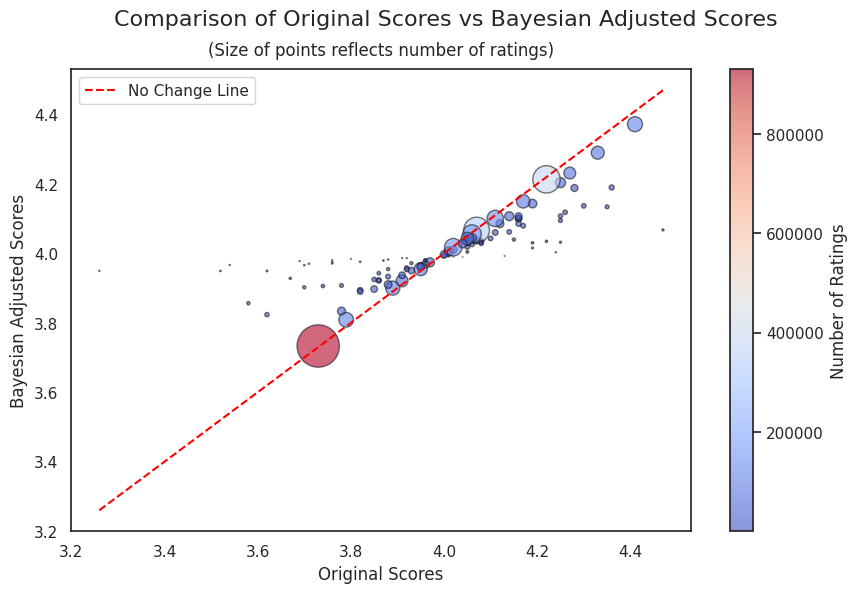

In [ ]:
import matplotlib.pyplot as plt

# Define plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot where point size corresponds to the number of ratings
scatter = plt.scatter(
    df['Score'],
    df['Bayesian_Average'],
    alpha=0.6,
    c=df['RatingsCount'],
    s=df['RatingsCount']/1000,  # Scale size of points for visibility
    cmap='coolwarm',  # Color map for the scatter points
    edgecolor='k'  # Black edge color for points for clarity
)

# Add a line indicating where Original Score = Bayesian Adjusted Score (no change)
plt.plot(
    [df['Score'].min(), df['Score'].max()],
    [df['Score'].min(), df['Score'].max()],
    color='red',
    linestyle='--',
    label='No Change Line'
)

# Add color bar for RatingsCount
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Ratings')

# Add a main title and subtitle, adjusting their sizes and positions
plt.suptitle('Comparison of Original Scores vs Bayesian Adjusted Scores', fontsize=16)
plt.title('(Size of points reflects number of ratings)', fontsize=12, pad=10)

# Add axis labels with more detail
plt.xlabel('Original Scores', fontsize=12)
plt.ylabel('Bayesian Adjusted Scores', fontsize=12)

# Add a legend to explain the red line
plt.legend()

# Show the plot
plt.show()

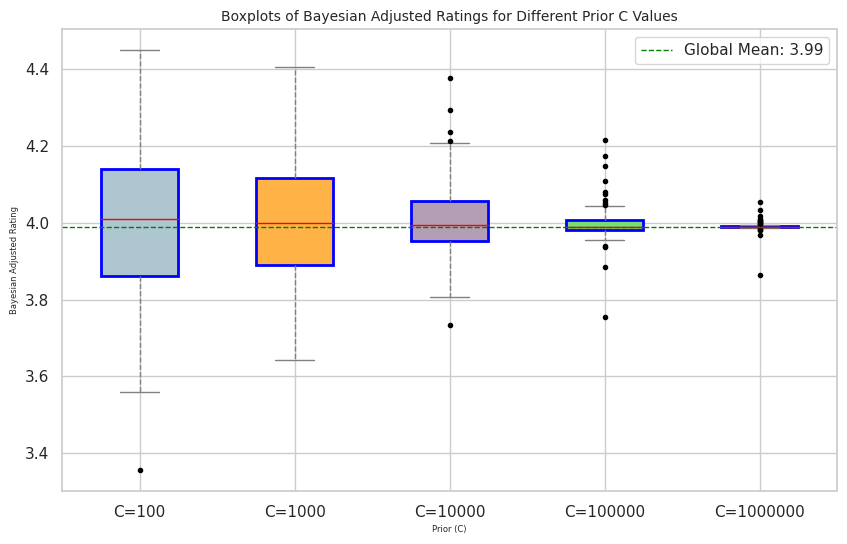

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for enhanced aesthetics
sns.set(style='whitegrid')

# Assuming df is your DataFrame with 'Score' and 'RatingsCount' columns
global_mean_rating = df['Score'].mean()

# Define specific C values for which to create boxplots
C_values = [100, 1000, 10000, 100000, 1000000]

# Compute Bayesian adjusted ratings for each C value
for C in C_values:
    df[f'Bayesian_Average_C_{C}'] = (
        (df['RatingsCount'] * df['Score'] + C * global_mean_rating) / (df['RatingsCount'] + C)
    )

# Prepare data for boxplots
adjusted_ratings_columns = [f'Bayesian_Average_C_{C}' for C in C_values]
adjusted_ratings_data = [df[col] for col in adjusted_ratings_columns]

# Define pastel colors for boxplots
pastel_colors = ['#AEC6CF', '#FFB347', '#B39EB5', '#77DD77', '#FF6961']

# Create the plot
plt.figure(figsize=(10, 6))

# Customize box properties
boxprops = dict(linestyle='-', linewidth=2, edgecolor='blue')
medianprops = dict(linestyle='-', linewidth=1.0, color='red')  # Adjusted linewidth
whiskerprops = dict(linestyle='--', color='gray')
capprops = dict(color='gray')

# Adjust flier properties to reduce outlier size
flierprops = dict(marker='o', markerfacecolor='black', markersize=3, linestyle='none')

# Create boxplots with pastel-colored patches
boxplot = plt.boxplot(
    adjusted_ratings_data,
    labels=[f'C={C}' for C in C_values],
    showfliers=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    flierprops=flierprops
)

# Color the boxes with pastel colors
for patch, color in zip(boxplot['boxes'], pastel_colors):
    patch.set(facecolor=color)

# Add a horizontal line for the global mean rating
plt.axhline(
    global_mean_rating,
    color='green',
    linestyle='--',
    linewidth=1.0,  # Ensure the linewidth is consistent
    label=f'Global Mean: {global_mean_rating:.2f}'
)

# Customize aesthetics
plt.xlabel('Prior (C)', fontsize=6)
plt.ylabel('Bayesian Adjusted Rating', fontsize=6)
plt.title(
    'Boxplots of Bayesian Adjusted Ratings for Different Prior C Values',
    fontsize=10
)
plt.grid(True)

# Add legend for global mean
plt.legend()

# Save the plot to a file
plt.savefig('bayesian_adjusted_ratings_boxplot.png', dpi=300)

# Display the plot
plt.show()

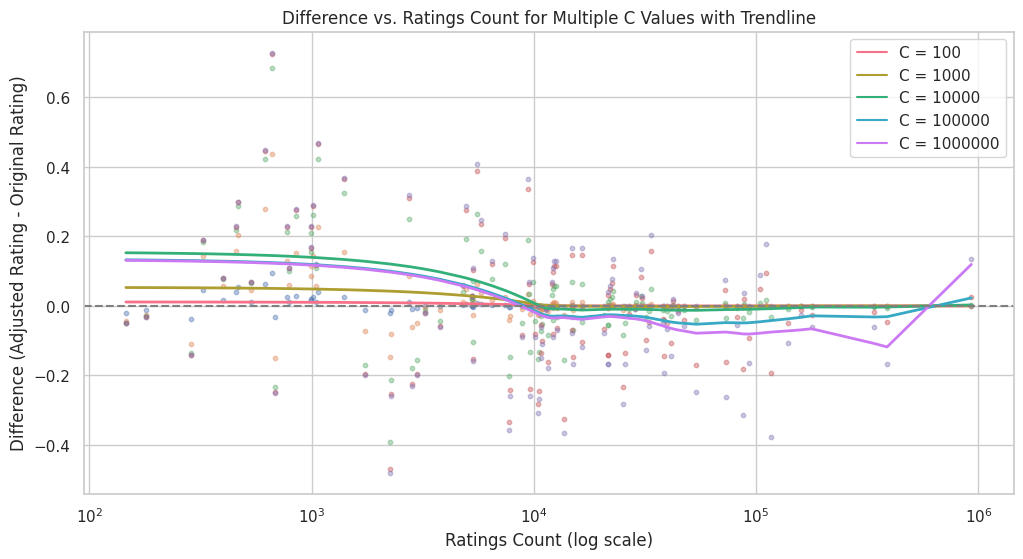

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Create figure and axis
plt.figure(figsize=(12, 6))

# List to hold the line objects for legend
lines_for_legend = []

# Colors for each C value to ensure consistency in the plot and legend
colors = sns.color_palette("husl", len(C_values))  # Use a color palette from Seaborn

# Loop through C values and create scatter plots with trend lines
for i, C in enumerate(C_values):
    df[f'Bayesian_Average_C_{C}'] = (
        df['RatingsCount'] * df['Score'] + C * global_mean_rating
    ) / (df['RatingsCount'] + C)
    df[f'Difference_C_{C}'] = df[f'Bayesian_Average_C_{C}'] - df['Score']

    # Scatter plot with reduced point size and opacity
    plt.scatter(
        df['RatingsCount'],
        df[f'Difference_C_{C}'],
        alpha=0.4,  # Reduced transparency for points
        s=10  # Smaller point size
    )

    # Trendline (LOWESS smoothing)
    sns.regplot(
        x=df['RatingsCount'],
        y=df[f'Difference_C_{C}'],
        scatter=False,  # No additional points for trendline
        lowess=True,  # Smoothing applied
        line_kws={'color': colors[i], 'linewidth': 2}  # Assign color from palette
    )

    # Append each line to the list for the legend with correct color
    lines_for_legend.append(mlines.Line2D([], [], color=colors[i], label=f'C = {C}'))

# Add baseline (y=0)
plt.axhline(y=0, color='gray', linestyle='--')

# Add labels and title
plt.xscale('log')
plt.xlabel('Ratings Count (log scale)')
plt.ylabel('Difference (Adjusted Rating - Original Rating)')
plt.title('Difference vs. Ratings Count for Multiple C Values with Trendline')

# Add a custom legend with only lines for each C value
plt.legend(handles=lines_for_legend)

# Show grid and plot
plt.grid(True)
plt.show()

# Proceeding to Choose Final Adjusted Bayesian Scores

In [ ]:
# Calculate the global mean rating R
global_mean_rating = df['Score'].mean()
print(f"Global Mean Rating (R): {global_mean_rating}")

# Define the C values to compare
C_median = df['RatingsCount'].median()       # Option A: Median RatingsCount
C_intermediate = 25000                       # Option C: Intermediate value
C_75th_percentile = df['RatingsCount'].quantile(0.75)  # Option B: 75th Percentile RatingsCount

# Display the C values
print(f"Option A - Median RatingsCount (C_median): {C_median}")
print(f"Option B - 75th Percentile RatingsCount (C_75th_percentile): {C_75th_percentile}")
print(f"Option C - Intermediate Value (C_intermediate): {C_intermediate}")

# Compute adjusted scores for each C value
C_values = [C_median, C_intermediate, C_75th_percentile]
C_labels = ['C_median', 'C_intermediate', 'C_75th_percentile']

for C, label in zip(C_values, C_labels):
    df[f'Bayesian_Score_{label}'] = (
        df['RatingsCount'] * df['Score'] + C * global_mean_rating
    ) / (df['RatingsCount'] + C)

# Display the first few rows with the new columns
df[['Score', 'RatingsCount', 'Bayesian_Score_C_median', 'Bayesian_Score_C_intermediate', 'Bayesian_Score_C_75th_percentile']].head()

Global Mean Rating (R): 3.989333333333333
Option A - Median RatingsCount (C_median): 11558.0
Option B - 75th Percentile RatingsCount (C_75th_percentile): 30630.0
Option C - Intermediate Value (C_intermediate): 25000


,Score,RatingsCount,Bayesian_Score_C_median,Bayesian_Score_C_intermediate,Bayesian_Score_C_75th_percentile
0,4.07,20705,4.041102,4.025876,4.021869
1,4.05,10818,4.018664,4.007656,4.005167
2,3.92,9532,3.957997,3.970195,3.972878
3,3.82,14878,3.894034,3.926157,3.933973
4,3.85,9954,3.924861,3.949655,3.955159


In [ ]:
# Define thresholds for low and high RatingsCount
low_threshold = df['RatingsCount'].quantile(0.25)
high_threshold = df['RatingsCount'].quantile(0.75)

# Create a summary table
summary_list = []

for C_label in C_labels:
    adjusted_col = f'Bayesian_Score_{C_label}'
    df['Difference'] = df[adjusted_col] - df['Score']

    # Average adjustment for low RatingsCount books
    low_ratings_books = df[df['RatingsCount'] <= low_threshold]
    avg_adjustment_low = (low_ratings_books['Difference']).mean()

    # Average adjustment for high RatingsCount books
    high_ratings_books = df[df['RatingsCount'] >= high_threshold]
    avg_adjustment_high = (high_ratings_books['Difference']).mean()

    summary_list.append({
        'C Value': C_label,
        'Avg Adjustment (Low RatingsCount)': avg_adjustment_low,
        'Avg Adjustment (High RatingsCount)': avg_adjustment_high
    })

# Convert to DataFrame and display
adjustment_summary = pd.DataFrame(summary_list)
adjustment_summary

,C Value,Avg Adjustment (Low RatingsCount),Avg Adjustment (High RatingsCount)
0,C_median,0.099205,-0.010187
1,C_intermediate,0.100984,-0.018564
2,C_75th_percentile,0.101244,-0.021365


# Bayesian Adjustment Validation (using the median ratings count C = 11,558)


                  Method  Correlation with RatingsCount  \
0          Laplace_Score                       0.256625   
1        Dirichlet_Score                       0.256625   
2         Weighted_Score                       0.898341   
3     Wilson_Lower_Bound                       0.358242   
4  Empirical_Bayes_Score                       0.997045   

   Average Change in Score  
0                 0.127216  
1                 0.127216  
2                 0.714051  
3                 3.399982  
4                 2.106637  


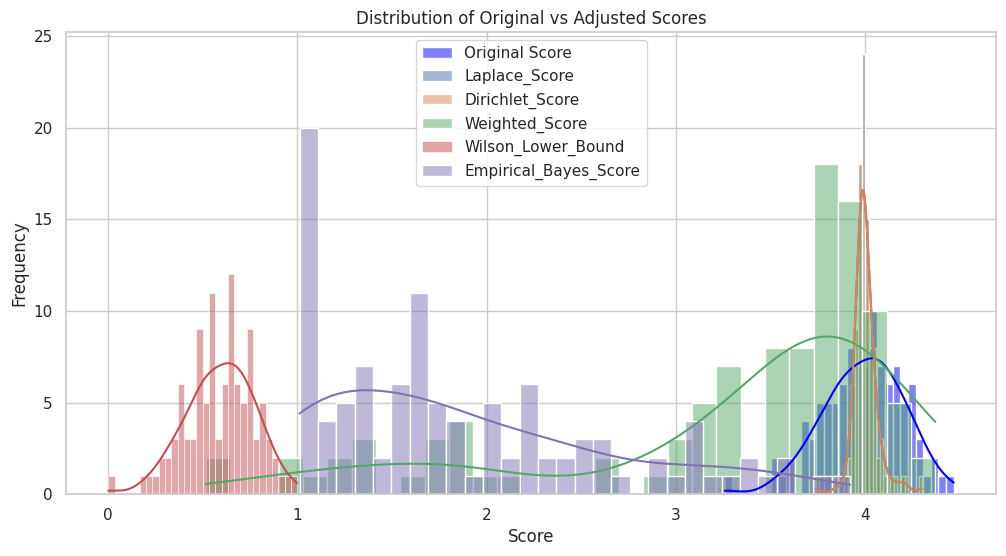

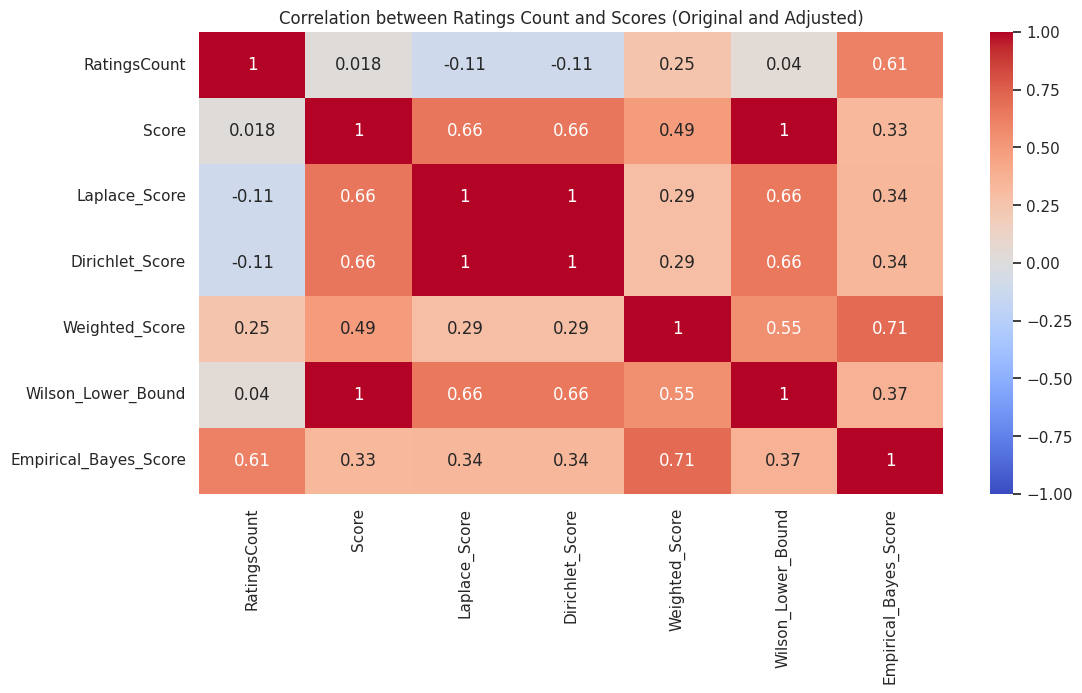

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Step 1: Define Methods for Score Adjustments
def laplace_smoothing(df, C, M):
    return (df['Score'] * df['RatingsCount'] + M * C) / (df['RatingsCount'] + C)

def dirichlet_prior(df, alpha, M):
    return (df['Score'] * df['RatingsCount'] + M * alpha) / (df['RatingsCount'] + alpha)

def weighted_average(df, k):
    return (df['Score'] * df['RatingsCount']) / (df['RatingsCount'] + k)

def wilson_lower_bound(df, Z):
    p = (df['Score'] - df['Score'].min()) / (df['Score'].max() - df['Score'].min())  # Normalized score
    n = df['RatingsCount']
    return ((p + Z**2 / (2 * n)) - Z * np.sqrt((p * (1 - p) / n) + Z**2 / (4 * n**2))) / (1 + Z**2 / n)

def empirical_bayes(df, alpha):
    return (alpha + df['RatingsCount'] * df['Score']) / (alpha + df['RatingsCount'])

# Step 2: Apply All Methods
C = df['RatingsCount'].mean()  # For Laplace Smoothing and Dirichlet Priors
M = df['Score'].mean()         # Global mean score for Laplace Smoothing and Dirichlet Priors
k = 1000                       # For weighted average
Z = 1.96                       # Z-value for Wilson Score (95% confidence)
alpha = df['RatingsCount'].mean()  # For Empirical Bayes

# Calculate adjusted scores for each method
df['Laplace_Score'] = laplace_smoothing(df, C, M)
df['Dirichlet_Score'] = dirichlet_prior(df, C, M)
df['Weighted_Score'] = weighted_average(df, k)
df['Wilson_Lower_Bound'] = wilson_lower_bound(df, Z)
df['Empirical_Bayes_Score'] = empirical_bayes(df, alpha)

# Step 3: Compare the Methods
methods = ['Laplace_Score', 'Dirichlet_Score', 'Weighted_Score', 'Wilson_Lower_Bound', 'Empirical_Bayes_Score']

comparison_results = []
for method in methods:
    # Correlation between RatingsCount and Adjusted Score
    corr, _ = spearmanr(df['RatingsCount'], df[method])

    # Average difference between original and adjusted scores
    avg_diff = np.mean(np.abs(df['Score'] - df[method]))

    comparison_results.append({
        'Method': method,
        'Correlation with RatingsCount': corr,
        'Average Change in Score': avg_diff
    })

# Step 4: Create DataFrame for Comparison
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

# Step 5: Visualize Distributions of Adjusted Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Score'], kde=True, label='Original Score', color='blue', bins=30)

for method in methods:
    sns.histplot(df[method], kde=True, label=method, bins=30)

plt.title('Distribution of Original vs Adjusted Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 6: Visualize Correlation with Ratings Count
plt.figure(figsize=(12, 6))
sns.heatmap(df[['RatingsCount', 'Score'] + methods].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Ratings Count and Scores (Original and Adjusted)')
plt.show()

         C Value     Method  Correlation  Avg Change in Score
0   19822.304762    Laplace     0.247077             0.111499
1   19822.304762  Dirichlet     0.247077             0.111499
2   39644.609524    Laplace     0.256625             0.127216
3   39644.609524  Dirichlet     0.256625             0.127216
4   79289.219048    Laplace     0.261684             0.140201
5   79289.219048  Dirichlet     0.261684             0.140201
6  198223.047619    Laplace     0.268287             0.152770
7  198223.047619  Dirichlet     0.268287             0.152770


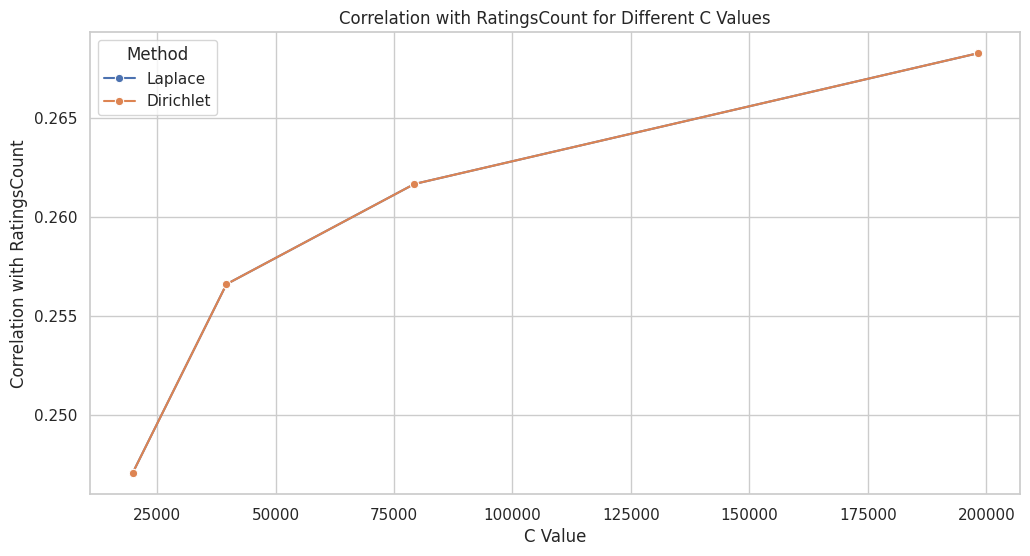

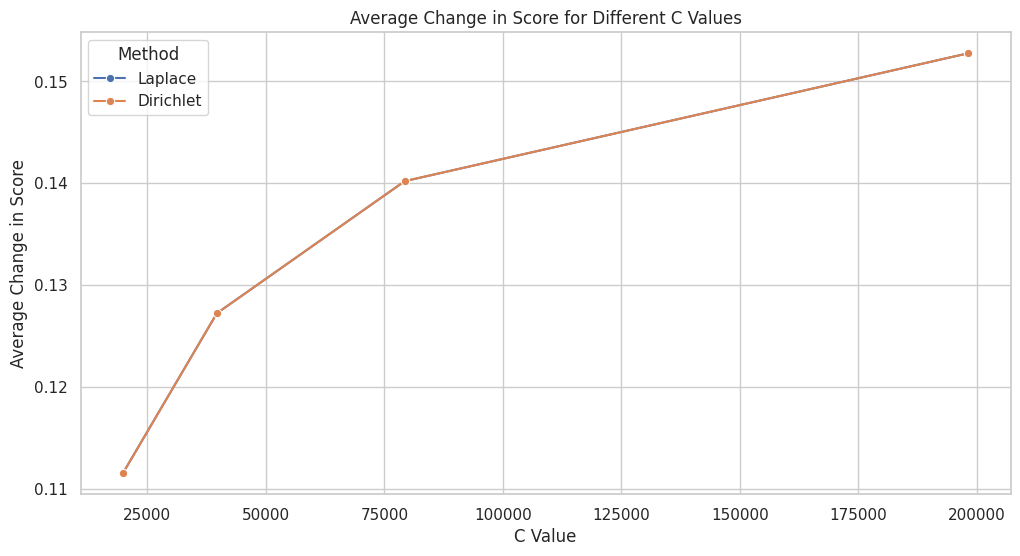

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Function to calculate Laplace Smoothing
def laplace_smoothing(df, C, M):
    return (df['Score'] * df['RatingsCount'] + M * C) / (df['RatingsCount'] + C)

# Function to calculate Dirichlet Priors
def dirichlet_prior(df, C, M):
    return (df['Score'] * df['RatingsCount'] + M * C) / (df['RatingsCount'] + C)

# Set up the global mean M
M = df['Score'].mean()  # Global mean score for Laplace Smoothing and Dirichlet Priors

# Test different values of C for both methods
C_values = [df['RatingsCount'].mean() * 0.5, df['RatingsCount'].mean(), df['RatingsCount'].mean() * 2, df['RatingsCount'].mean() * 5]

# Store results for comparison
results = []

for C in C_values:
    # Calculate Laplace and Dirichlet scores for this C
    df['Laplace_Score'] = laplace_smoothing(df, C, M)
    df['Dirichlet_Score'] = dirichlet_prior(df, C, M)

    # Calculate correlations for Laplace and Dirichlet with RatingsCount
    corr_laplace, _ = spearmanr(df['RatingsCount'], df['Laplace_Score'])
    corr_dirichlet, _ = spearmanr(df['RatingsCount'], df['Dirichlet_Score'])

    # Calculate average change in scores
    avg_change_laplace = np.mean(np.abs(df['Score'] - df['Laplace_Score']))
    avg_change_dirichlet = np.mean(np.abs(df['Score'] - df['Dirichlet_Score']))

    # Append results to compare later
    results.append({
        'C Value': C,
        'Method': 'Laplace',
        'Correlation': corr_laplace,
        'Avg Change in Score': avg_change_laplace
    })
    results.append({
        'C Value': C,
        'Method': 'Dirichlet',
        'Correlation': corr_dirichlet,
        'Avg Change in Score': avg_change_dirichlet
    })

# Convert results to DataFrame
comparison_df = pd.DataFrame(results)
print(comparison_df)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot correlations
sns.lineplot(x='C Value', y='Correlation', hue='Method', data=comparison_df, marker="o")
plt.title('Correlation with RatingsCount for Different C Values')
plt.xlabel('C Value')
plt.ylabel('Correlation with RatingsCount')
plt.legend(title='Method')
plt.show()

# Plot average changes in score
plt.figure(figsize=(12, 6))
sns.lineplot(x='C Value', y='Avg Change in Score', hue='Method', data=comparison_df, marker="o")
plt.title('Average Change in Score for Different C Values')
plt.xlabel('C Value')
plt.ylabel('Average Change in Score')
plt.legend(title='Method')
plt.show()

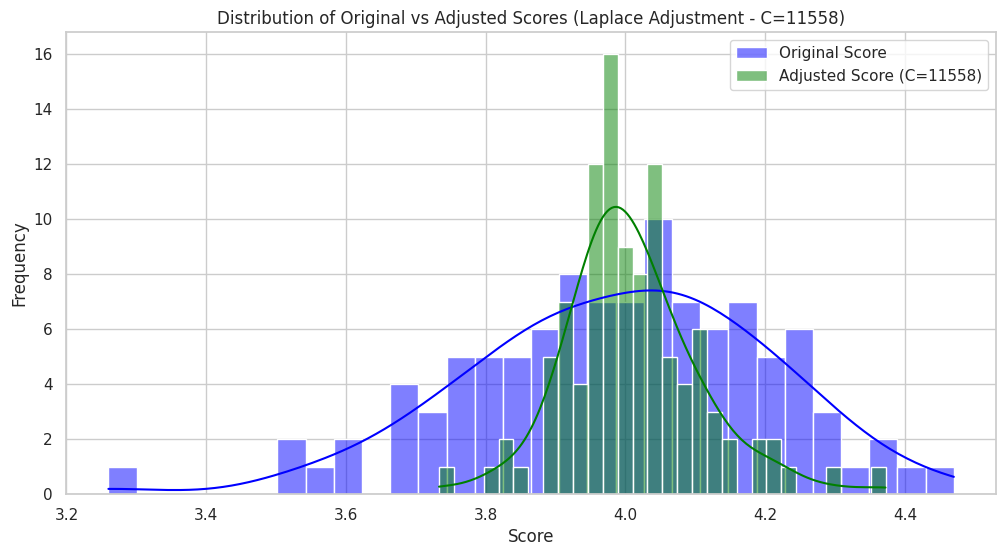

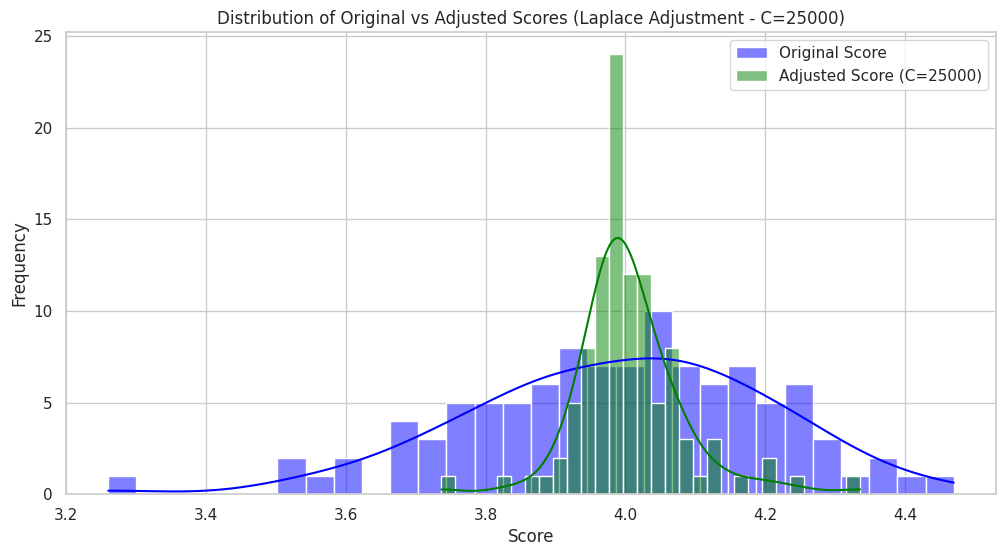

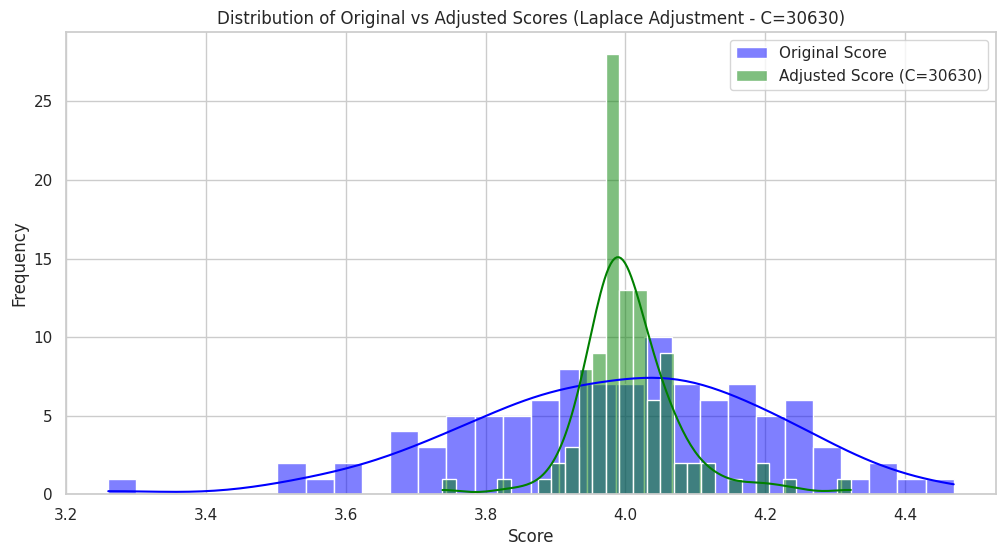

   C Value  Spearman Correlation (Original)  Spearman Correlation (Adjusted)  \
0    11558                         0.302974                         0.242857   
1    25000                         0.302974                         0.253556   
2    30630                         0.302974                         0.254748   

   Paired t-test p-value  Cohen's d  
0               0.154274  -0.126229  
1               0.290041  -0.107951  
2               0.334874  -0.101464  


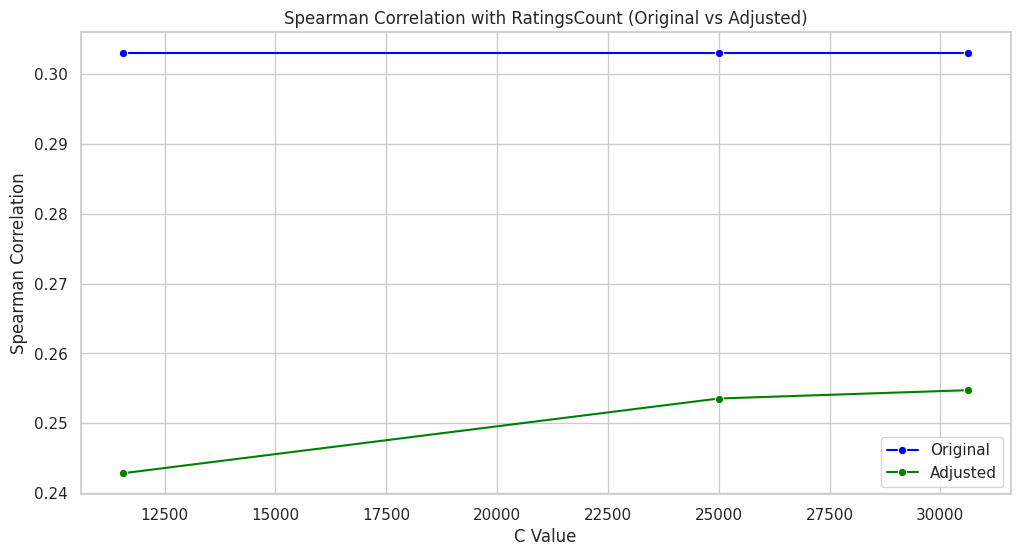

<ipython-input-33-3eacd309a425>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='C Value', y='Paired t-test p-value', data=validation_df, palette='muted')


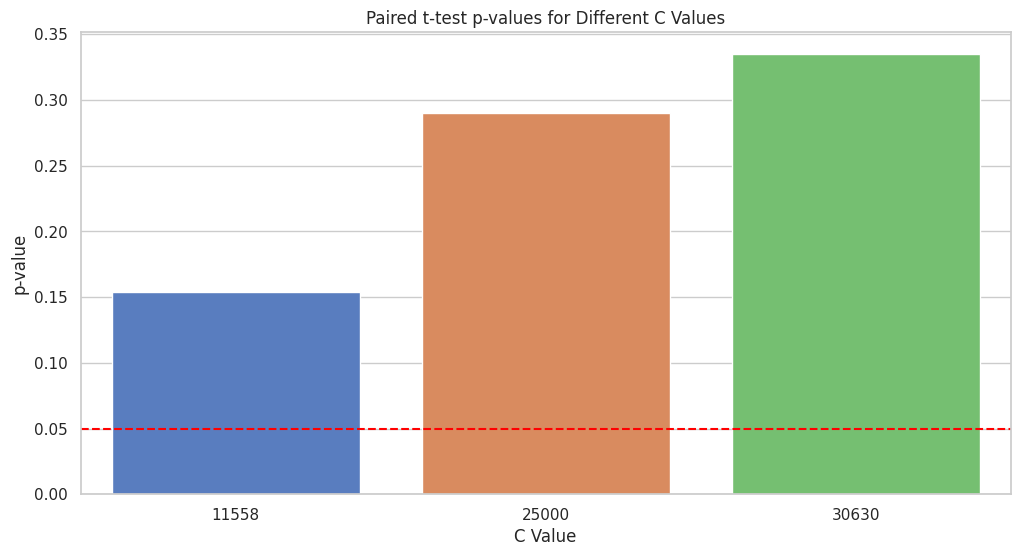

<ipython-input-33-3eacd309a425>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='C Value', y='Cohen\'s d', data=validation_df, palette='muted')


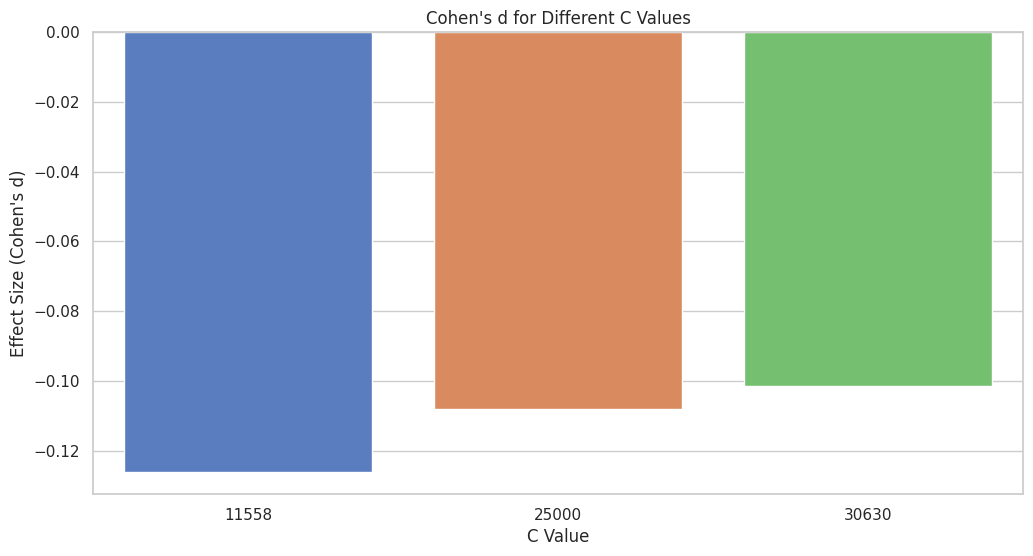

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, ttest_rel

# Function to calculate Laplace Smoothing
def laplace_smoothing(df, C, M):
    return (df['Score'] * df['RatingsCount'] + M * C) / (df['RatingsCount'] + C)

# Function to calculate Cohen's d
def cohen_d(x, y):
    diff_mean = x.mean() - y.mean()
    pooled_std = (((x.std() ** 2) + (y.std() ** 2)) / 2) ** 0.5
    return diff_mean / pooled_std

# Set up the global mean M
M = df['Score'].mean()  # Global mean score for Laplace Smoothing

# Use the specified values of C
C_values = [11558, 25000, 30630]  # Median, Intermediate, 75th Percentile

# Store results for comparison
validation_results = []

for C in C_values:
    # Calculate Laplace scores for each C value
    df['Laplace_Score'] = laplace_smoothing(df, C, M)

    # 1. Distribution Comparison - Pre vs Post Bayesian Adjustment
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Score'], kde=True, color='blue', label='Original Score', bins=30)
    sns.histplot(df['Laplace_Score'], kde=True, color='green', label=f'Adjusted Score (C={C})', bins=30)
    plt.title(f'Distribution of Original vs Adjusted Scores (Laplace Adjustment - C={C})')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # 2. Spearman's Correlation: Ratings Count vs Score (Pre and Post Adjustment)
    corr_pre, _ = spearmanr(df['RatingsCount'], df['Score'])
    corr_post, _ = spearmanr(df['RatingsCount'], df['Laplace_Score'])

    # 3. Paired t-Test: Test for significant differences between pre- and post-adjustment scores
    t_stat, p_value = ttest_rel(df['Score'], df['Laplace_Score'])

    # 4. Effect Size Calculation: Cohen's d
    effect_size = cohen_d(df['Score'], df['Laplace_Score'])

    # Append validation results
    validation_results.append({
        'C Value': C,
        'Spearman Correlation (Original)': corr_pre,
        'Spearman Correlation (Adjusted)': corr_post,
        'Paired t-test p-value': p_value,
        'Cohen\'s d': effect_size
    })

# Convert results to DataFrame for easier comparison
validation_df = pd.DataFrame(validation_results)
print(validation_df)

# Visualize correlation results
plt.figure(figsize=(12, 6))
sns.lineplot(x='C Value', y='Spearman Correlation (Original)', data=validation_df, label='Original', marker="o", color='blue')
sns.lineplot(x='C Value', y='Spearman Correlation (Adjusted)', data=validation_df, label='Adjusted', marker="o", color='green')
plt.title('Spearman Correlation with RatingsCount (Original vs Adjusted)')
plt.xlabel('C Value')
plt.ylabel('Spearman Correlation')
plt.legend()
plt.show()

# Visualize paired t-test p-values and effect sizes
plt.figure(figsize=(12, 6))
sns.barplot(x='C Value', y='Paired t-test p-value', data=validation_df, palette='muted')
plt.title('Paired t-test p-values for Different C Values')
plt.xlabel('C Value')
plt.ylabel('p-value')
plt.axhline(y=0.05, color='red', linestyle='--')  # Line to show significance level
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='C Value', y='Cohen\'s d', data=validation_df, palette='muted')
plt.title('Cohen\'s d for Different C Values')
plt.xlabel('C Value')
plt.ylabel('Effect Size (Cohen\'s d)')
plt.show()

   C Value     Method  Correlation  Avg Change in Score
0    11558    Laplace     0.242857             0.097926
1    11558  Dirichlet     0.242857             0.097926
2    25000    Laplace     0.253556             0.117023
3    25000  Dirichlet     0.253556             0.117023
4    30630    Laplace     0.254748             0.121652
5    30630  Dirichlet     0.254748             0.121652


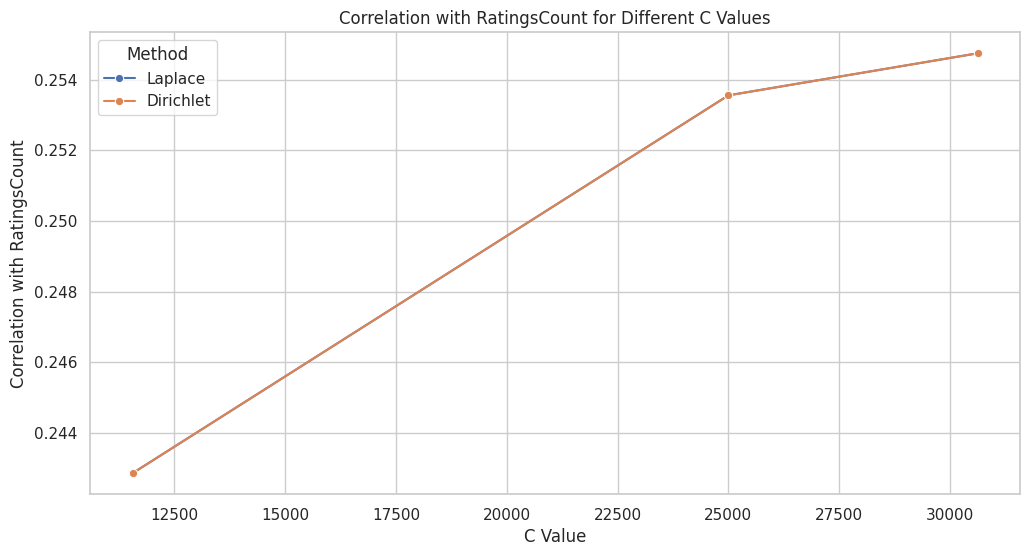

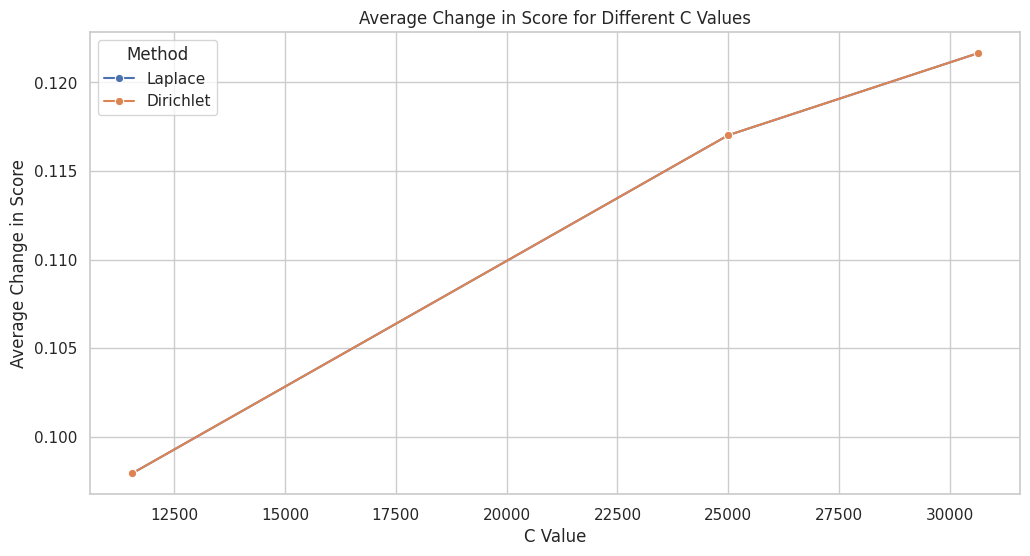

In [ ]:
# Function to calculate Laplace Smoothing
def laplace_smoothing(df, C, M):
    return (df['Score'] * df['RatingsCount'] + M * C) / (df['RatingsCount'] + C)

# Function to calculate Dirichlet Priors
def dirichlet_prior(df, C, M):
    return (df['Score'] * df['RatingsCount'] + M * C) / (df['RatingsCount'] + C)

# Set up the global mean M
M = df['Score'].mean()  # Global mean score for Laplace Smoothing and Dirichlet Priors

# Use the new specified values of C
C_values = [11558, 25000, 30630]  # Median, Intermediate, 75th Percentile

# Store results for comparison
results = []

for C in C_values:
    # Calculate Laplace and Dirichlet scores for this C
    df['Laplace_Score'] = laplace_smoothing(df, C, M)
    df['Dirichlet_Score'] = dirichlet_prior(df, C, M)

    # Calculate correlations for Laplace and Dirichlet with RatingsCount
    corr_laplace, _ = spearmanr(df['RatingsCount'], df['Laplace_Score'])
    corr_dirichlet, _ = spearmanr(df['RatingsCount'], df['Dirichlet_Score'])

    # Calculate average change in scores
    avg_change_laplace = np.mean(np.abs(df['Score'] - df['Laplace_Score']))
    avg_change_dirichlet = np.mean(np.abs(df['Score'] - df['Dirichlet_Score']))

    # Append results to compare later
    results.append({
        'C Value': C,
        'Method': 'Laplace',
        'Correlation': corr_laplace,
        'Avg Change in Score': avg_change_laplace
    })
    results.append({
        'C Value': C,
        'Method': 'Dirichlet',
        'Correlation': corr_dirichlet,
        'Avg Change in Score': avg_change_dirichlet
    })

# Convert results to DataFrame
comparison_df = pd.DataFrame(results)
print(comparison_df)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot correlations
sns.lineplot(x='C Value', y='Correlation', hue='Method', data=comparison_df, marker="o")
plt.title('Correlation with RatingsCount for Different C Values')
plt.xlabel('C Value')
plt.ylabel('Correlation with RatingsCount')
plt.legend(title='Method')
plt.show()

# Plot average changes in score
plt.figure(figsize=(12, 6))
sns.lineplot(x='C Value', y='Avg Change in Score', hue='Method', data=comparison_df, marker="o")
plt.title('Average Change in Score for Different C Values')
plt.xlabel('C Value')
plt.ylabel('Average Change in Score')
plt.legend(title='Method')
plt.show()


Validation for C = 11,558 (Median):


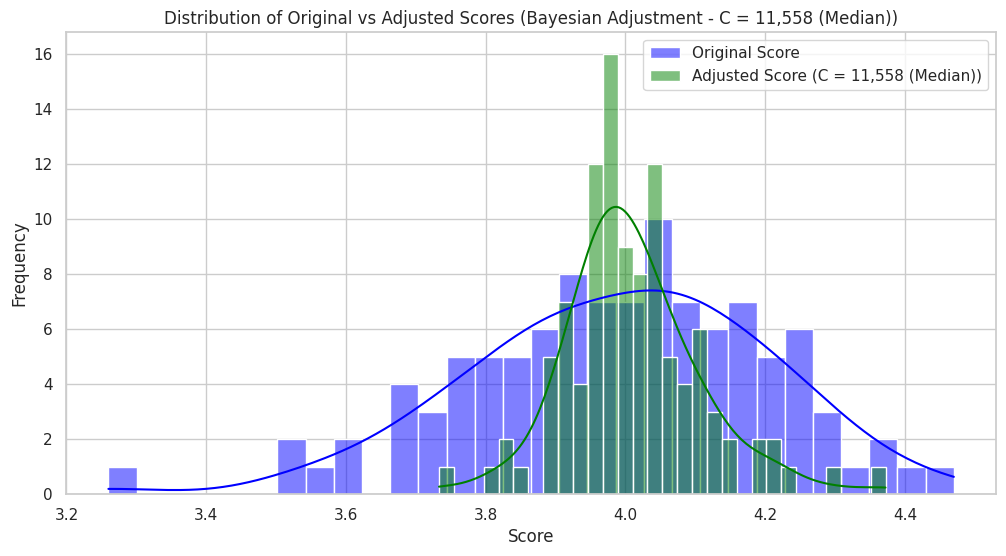

Spearman's correlation between RatingsCount and Original Score: 0.3030
Spearman's correlation between RatingsCount and Adjusted Score (C = 11,558 (Median)): 0.2429
Paired t-test: t-statistic = -1.4350, p-value = 0.1543
Effect Size (Cohen's d): -0.1262

Summary of Bayesian Adjustment Validation for C = 11,558 (Median):
- Spearman's Correlation (Pre-Adjustment): 0.3030
- Spearman's Correlation (Post-Adjustment): 0.2429
- Paired t-test p-value: 0.1543 (Significant if p < 0.05)
- Effect Size (Cohen's d): -0.1262 (Small: 0.2, Medium: 0.5, Large: 0.8)

Validation for C = 25,000 (Intermediate):


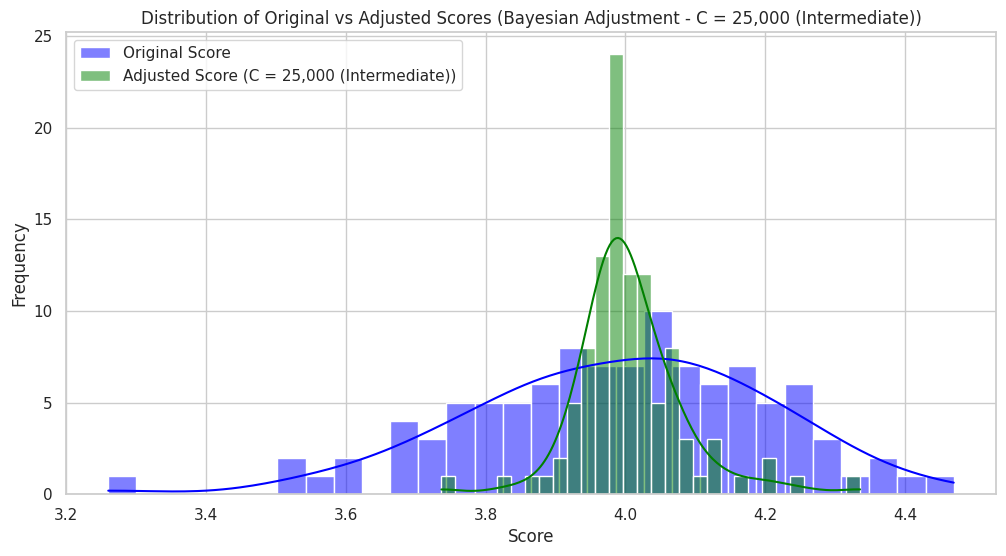

Spearman's correlation between RatingsCount and Original Score: 0.3030
Spearman's correlation between RatingsCount and Adjusted Score (C = 25,000 (Intermediate)): 0.2536
Paired t-test: t-statistic = -1.0635, p-value = 0.2900
Effect Size (Cohen's d): -0.1080

Summary of Bayesian Adjustment Validation for C = 25,000 (Intermediate):
- Spearman's Correlation (Pre-Adjustment): 0.3030
- Spearman's Correlation (Post-Adjustment): 0.2536
- Paired t-test p-value: 0.2900 (Significant if p < 0.05)
- Effect Size (Cohen's d): -0.1080 (Small: 0.2, Medium: 0.5, Large: 0.8)

Validation for C = 30,630 (75th Percentile):


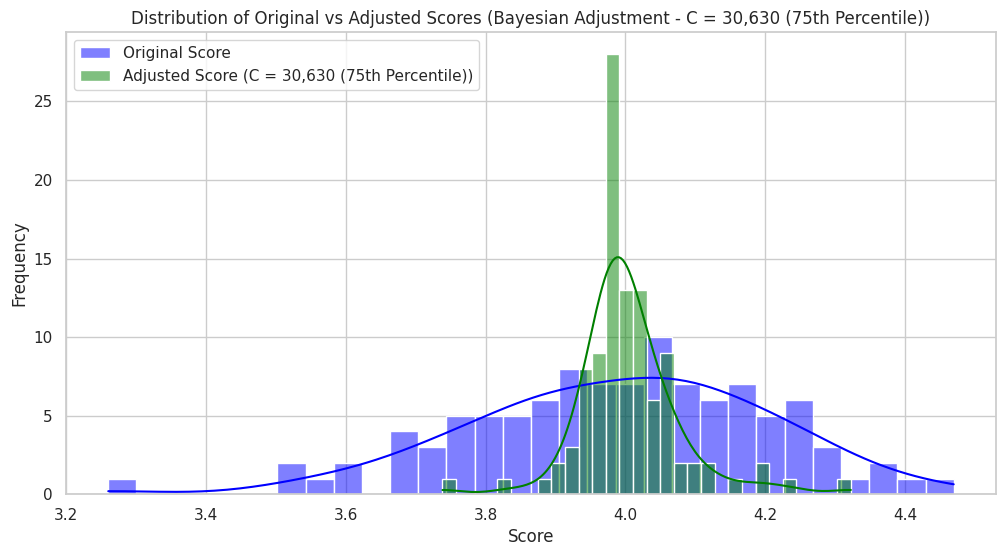

Spearman's correlation between RatingsCount and Original Score: 0.3030
Spearman's correlation between RatingsCount and Adjusted Score (C = 30,630 (75th Percentile)): 0.2547
Paired t-test: t-statistic = -0.9688, p-value = 0.3349
Effect Size (Cohen's d): -0.1015

Summary of Bayesian Adjustment Validation for C = 30,630 (75th Percentile):
- Spearman's Correlation (Pre-Adjustment): 0.3030
- Spearman's Correlation (Post-Adjustment): 0.2547
- Paired t-test p-value: 0.3349 (Significant if p < 0.05)
- Effect Size (Cohen's d): -0.1015 (Small: 0.2, Medium: 0.5, Large: 0.8)


In [ ]:
# List of C values and corresponding columns
C_values = [
    ("C = 11,558 (Median)", 'Bayesian_Score_C_median'),
    ("C = 25,000 (Intermediate)", 'Bayesian_Score_C_intermediate'),
    ("C = 30,630 (75th Percentile)", 'Bayesian_Score_C_75th_percentile')
]

# Loop over each C value and perform the analysis
for C_label, adjusted_column in C_values:
    print(f"\nValidation for {C_label}:")

    # 1. Distribution Comparison - Pre vs Post Bayesian Adjustment
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Score'], kde=True, color='blue', label='Original Score', bins=30)
    sns.histplot(df[adjusted_column], kde=True, color='green', label=f'Adjusted Score ({C_label})', bins=30)
    plt.title(f'Distribution of Original vs Adjusted Scores (Bayesian Adjustment - {C_label})')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # 2. Correlation Analysis: Ratings Count vs Score (Pre and Post Adjustment)
    corr_pre, _ = spearmanr(df['RatingsCount'], df['Score'])
    corr_post, _ = spearmanr(df['RatingsCount'], df[adjusted_column])

    print(f"Spearman's correlation between RatingsCount and Original Score: {corr_pre:.4f}")
    print(f"Spearman's correlation between RatingsCount and Adjusted Score ({C_label}): {corr_post:.4f}")

    # 3. Paired t-Test: Test for significant differences between pre- and post-adjustment scores
    t_stat, p_value = ttest_rel(df['Score'], df[adjusted_column])
    print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

    # 4. Effect Size Calculation: Cohen's d
    effect_size = cohen_d(df['Score'], df[adjusted_column])
    print(f"Effect Size (Cohen's d): {effect_size:.4f}")

    # Summary for each C value
    print(f"\nSummary of Bayesian Adjustment Validation for {C_label}:")
    print(f"- Spearman's Correlation (Pre-Adjustment): {corr_pre:.4f}")
    print(f"- Spearman's Correlation (Post-Adjustment): {corr_post:.4f}")
    print(f"- Paired t-test p-value: {p_value:.4f} (Significant if p < 0.05)")
    print(f"- Effect Size (Cohen's d): {effect_size:.4f} (Small: 0.2, Medium: 0.5, Large: 0.8)")

**Validate the Adjusted Scores - Statistical Checks**

**Save the Updated Dataset**

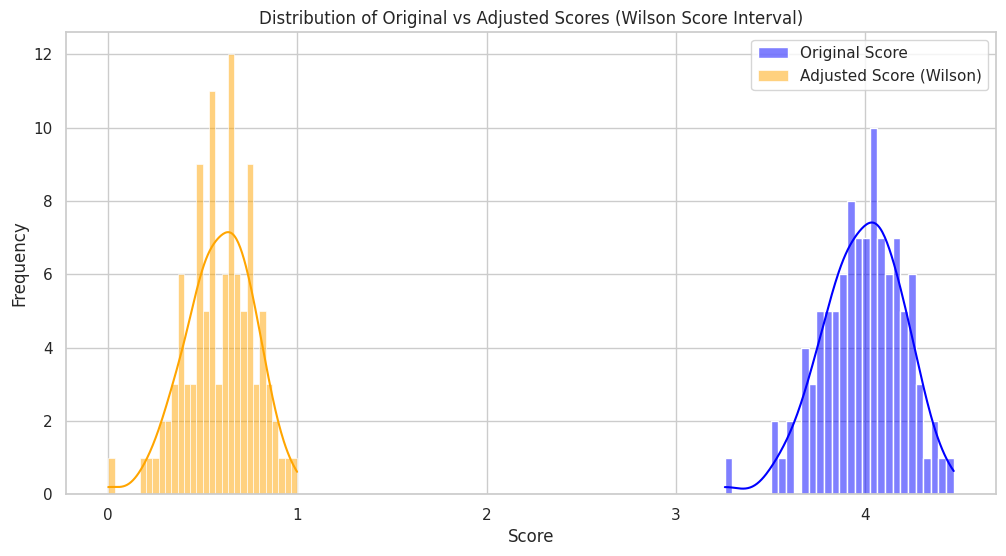

Spearman's Correlation (Original): 0.30297359487725467
Spearman's Correlation (Adjusted - Wilson): 0.3582417582417582
Paired t-test p-value (Wilson): 1.9453131606143045e-207
Cohen's d (Wilson): 17.293782810948322


In [34]:
from scipy.stats import norm

# Function to calculate Wilson Lower Bound
def wilson_lower_bound(df, Z):
    p = (df['Score'] - df['Score'].min()) / (df['Score'].max() - df['Score'].min())  # Normalized score
    n = df['RatingsCount']
    return ((p + Z**2 / (2 * n)) - Z * np.sqrt((p * (1 - p) / n) + Z**2 / (4 * n**2))) / (1 + Z**2 / n)

# Z-score for 95% confidence interval
Z = norm.ppf(0.975)

# Apply Wilson Score Interval to adjust scores
df['Wilson_Score'] = wilson_lower_bound(df, Z)

# Compare distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Score'], kde=True, color='blue', label='Original Score', bins=30)
sns.histplot(df['Wilson_Score'], kde=True, color='orange', label='Adjusted Score (Wilson)', bins=30)
plt.title('Distribution of Original vs Adjusted Scores (Wilson Score Interval)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Spearman's Correlation
corr_pre_wilson, _ = spearmanr(df['RatingsCount'], df['Score'])
corr_post_wilson, _ = spearmanr(df['RatingsCount'], df['Wilson_Score'])

# Paired t-Test
t_stat_wilson, p_value_wilson = ttest_rel(df['Score'], df['Wilson_Score'])

# Cohen's d for Wilson Score
effect_size_wilson = cohen_d(df['Score'], df['Wilson_Score'])

# Display Wilson results
print(f"Spearman's Correlation (Original): {corr_pre_wilson}")
print(f"Spearman's Correlation (Adjusted - Wilson): {corr_post_wilson}")
print(f"Paired t-test p-value (Wilson): {p_value_wilson}")
print(f"Cohen's d (Wilson): {effect_size_wilson}")


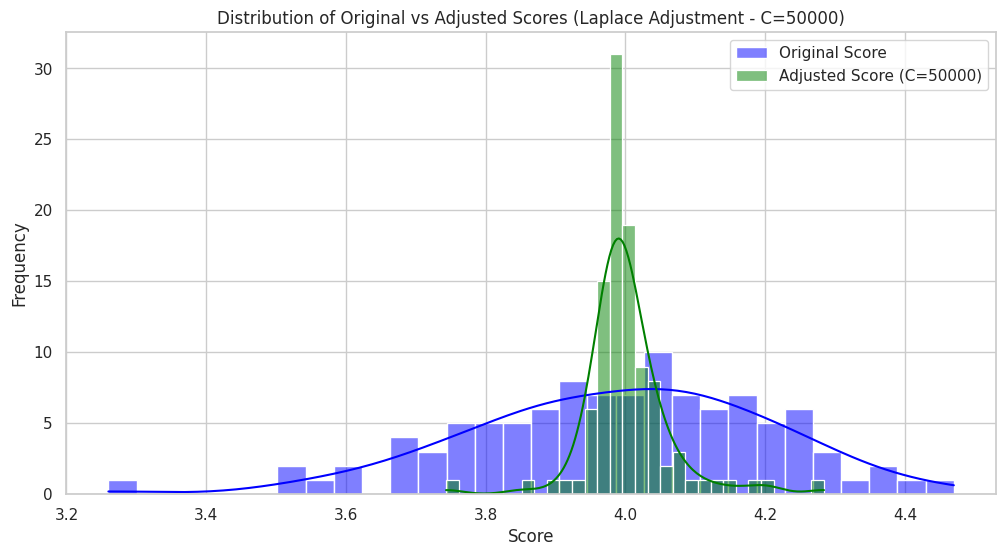

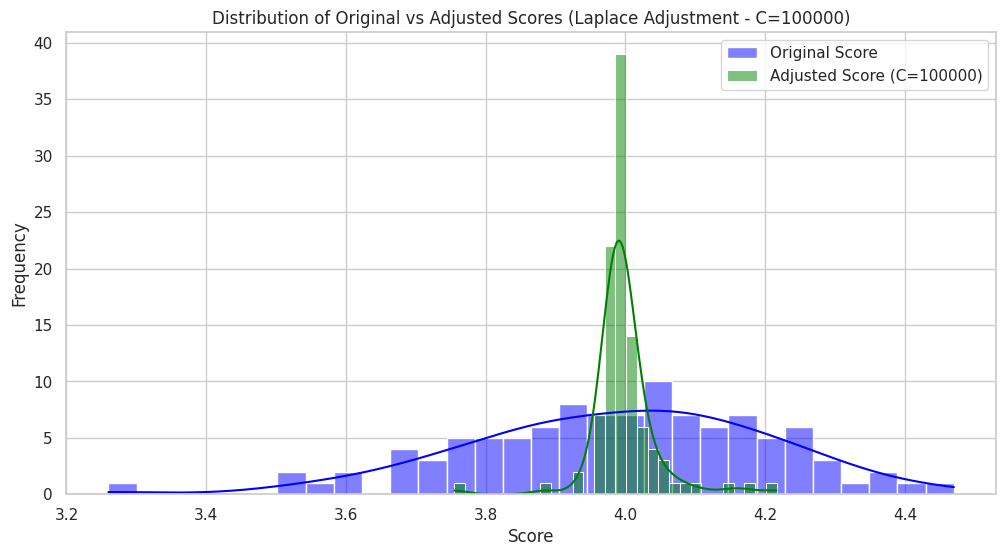

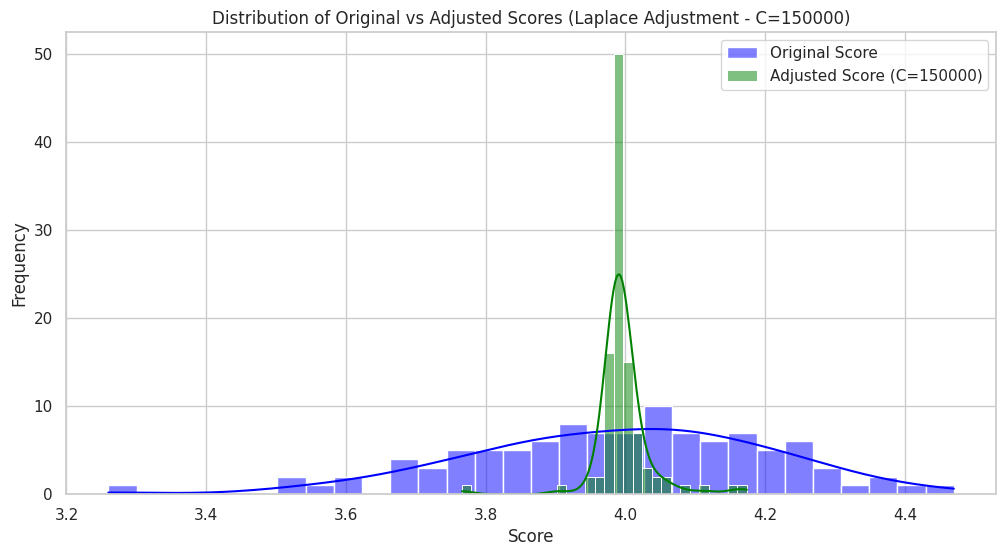

   C Value  Spearman Correlation (Original)  Spearman Correlation (Adjusted)  \
0    50000                         0.302974                         0.259216   
1   100000                         0.302974                         0.264721   
2   150000                         0.302974                         0.268049   

   Paired t-test p-value  Cohen's d  
0               0.453028  -0.084201  
1               0.625011  -0.058846  
2               0.716365  -0.045149  


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, ttest_rel

# Function to calculate Laplace Smoothing
def laplace_smoothing(df, C, M):
    return (df['Score'] * df['RatingsCount'] + M * C) / (df['RatingsCount'] + C)

# Function to calculate Cohen's d
def cohen_d(x, y):
    diff_mean = x.mean() - y.mean()
    pooled_std = (((x.std() ** 2) + (y.std() ** 2)) / 2) ** 0.5
    return diff_mean / pooled_std

# Set up the global mean M
M = df['Score'].mean()

# Test higher values of C
C_values = [50000, 100000, 150000]

# Store results for comparison
validation_results = []

for C in C_values:
    # Calculate Laplace scores for each C value
    df['Laplace_Score'] = laplace_smoothing(df, C, M)

    # 1. Distribution Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Score'], kde=True, color='blue', label='Original Score', bins=30)
    sns.histplot(df['Laplace_Score'], kde=True, color='green', label=f'Adjusted Score (C={C})', bins=30)
    plt.title(f'Distribution of Original vs Adjusted Scores (Laplace Adjustment - C={C})')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # 2. Spearman's Correlation
    corr_pre, _ = spearmanr(df['RatingsCount'], df['Score'])
    corr_post, _ = spearmanr(df['RatingsCount'], df['Laplace_Score'])

    # 3. Paired t-Test
    t_stat, p_value = ttest_rel(df['Score'], df['Laplace_Score'])

    # 4. Cohen's d (Effect Size)
    effect_size = cohen_d(df['Score'], df['Laplace_Score'])

    # Append results
    validation_results.append({
        'C Value': C,
        'Spearman Correlation (Original)': corr_pre,
        'Spearman Correlation (Adjusted)': corr_post,
        'Paired t-test p-value': p_value,
        'Cohen\'s d': effect_size
    })

# Convert results to DataFrame for easier comparison
validation_df = pd.DataFrame(validation_results)
print(validation_df)


In [ ]:
# Save the updated dataset with adjusted scores

# Save the DataFrame to a new CSV file in Google Drive
df.to_csv('/content/drive/MyDrive/cleaned_goodreads_dataset_with_adjusted_scores.csv', index=False)

print("Updated dataset saved successfully.")

# Composite Popularity Index

Popularity Variables:

    ReviewsCount: A measure of engagement and interaction.
    Popularity_ReadingNow: Indicates how many people are currently reading the book.
    Popularity_Wishlisted: Reflects future reading intentions,
    showing how many people are interested in reading the book later.

Goals:

    Create a Composite Popularity Index using three different methods:
        Standardization and Summation.
        Principal Component Analysis (PCA).
        Weighted Sum.

    Analyze Correlations between these variables to check for redundancy and guide composite index creation.

    Factor Analysis to validate the use of a single composite index.

In [ ]:
# Correlation Analysis between the popularity-related variables
popularity_vars = ['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']

# Calculate the correlation matrix
correlation_matrix = df_goodreads[popularity_vars].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Popularity Variables")
plt.show()

Correlation Matrix Analysis:

The correlation matrix between the popularity-related variables shows high correlations between all three variables, suggesting some degree of redundancy:

    ReviewsCount vs. Popularity_ReadingNow: 0.870.87
    ReviewsCount vs. Popularity_Wishlisted: 0.910.91
    Popularity_ReadingNow vs. Popularity_Wishlisted: 0.840.84

These strong correlations indicate that all three variables are closely related and likely measure different facets of the same underlying concept: popularity and engagement.

Implications:

    High Correlations:
        Since the correlations are above 0.8, these variables are not entirely independent of each other.
        This suggests that combining them into a single index might be reasonable, as they are likely capturing overlapping aspects of a book’s popularity.

    ReviewsCount and Popularity_Wishlisted:
        The highest correlation (0.910.91) between ReviewsCount and Popularity_Wishlisted shows that books
        with many reviews are also highly wishlisted.
        This makes sense, as books with more exposure and reviews tend to attract future readers.

    Redundancy Considerations:
        Given these correlations, combining the variables via PCA or Factor Analysis might be more appropriate
        than simple summation, as it would help reduce redundancy and focus on the main source of variance in the data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improve the pairplot with log scale, larger points, and transparency
g = sns.pairplot(df_goodreads[['ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']],
                 diag_kind='kde',  # Use KDE plot on the diagonal
                 plot_kws={'alpha': 0.6, 's': 60},  # Transparency and point size
                 markers="o")

# Apply log scale to each axis to handle skewed data
for ax in g.axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')

# Add overall title and adjust titles for better readability
plt.suptitle('Pairwise Relationships Between Popularity Variables (Log Scale)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Ranking Books by Popularity Using the PCA Index

# Sort the books by the PCA-based popularity index in descending order
df_goodreads_sorted_pca = df_goodreads.sort_values(by='Popularity_Index_PCA', ascending=False)

# Display the top 10 books based on the PCA popularity index
top_10_books_pca = df_goodreads_sorted_pca[['Popularity_Index_PCA', 'ReviewsCount', 'Popularity_ReadingNow', 'Popularity_Wishlisted']].head(10)
print(top_10_books_pca)

# Grouping Books Based on Appreciation and Popularity

By following these steps, you'll systematically explore different clustering methods, evaluate their performance, and select the most appropriate one for grouping books based on their Appreciation Bayesian Score and Popularity Index. This structured approach ensures that your clustering is both methodologically sound and practically meaningful.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Example: Loading data from a CSV file
# df_goodreads = pd.read_csv('path_to_your_goodreads_data.csv')

# Inspect the first few rows
print("First 5 rows of the dataset:")
print(df_goodreads.head())

# Summary statistics
print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

# Check for missing values
print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

**Address Skewness in RatingsCount**

Given the wide range and high skewness in RatingsCount, applying a log transformation can help normalize the distribution, making clustering more effective.

In [ ]:
# Apply log transformation to RatingsCount to reduce skewness
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])

# Verify the transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_goodreads['Log_RatingsCount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed RatingsCount')
plt.xlabel('Log(RatingsCount + 1)')
plt.ylabel('Frequency')
plt.show()

**Feature Selection**

Use the following features for clustering:

    * BayesianScore_NewThreshold
    * Log_RatingsCount
    * Popularity_Index_PCA

In [ ]:
# Select relevant features
clustering_features = ['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Popularity_Index_PCA']
clustering_data = df_goodreads[clustering_features].copy()

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Convert scaled data back to DataFrame for easier handling
clustering_data_scaled_df = pd.DataFrame(clustering_data_scaled, columns=['BayesianScore_Scaled', 'Log_RatingsCount_Scaled', 'Popularity_Index_Scaled'])

# **Exploratory Data Analysis (EDA)**: Visualization

The plots you have shared offer several preliminary insights based on your exploratory data analysis (EDA), which can help guide a clustering strategy.

1. **Scatter Plot (Bayesian Score vs Popularity Index)**

    Insight: Most data points are concentrated near the origin, with a small number of outliers, particularly for higher values of the Popularity Index.
    Clustering Implication: The concentration of data points suggests a dense cluster near the origin, but the outliers on the higher end of the Popularity Index may form separate, smaller clusters. This skewed distribution indicates the need for careful outlier handling or specialized clustering techniques like DBSCAN, which can handle density variations.

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BayesianScore_Scaled',
    y='Popularity_Index_Scaled',
    data=clustering_data_scaled_df,
    hue=None,
    palette='viridis'
)
plt.title('Scatter Plot of Scaled Features')
plt.xlabel('Bayesian Score (Scaled)')
plt.ylabel('Popularity Index (Scaled)')
plt.show()

Pair Plot

    Insight:
        Bayesian Score and Popularity Index: There seems to be no strong linear relationship between these
        two variables (a weak correlation).
        Log Ratings Count and Popularity Index: A notable positive relationship is observed between these two features,
        which is confirmed by the high density of points forming a curved pattern.
        Log Ratings Count and Bayesian Score: Some level of correlation exists, but the plot shows the data
        is more spread.
    Clustering Implication: These relationships suggest that "Log Ratings Count" and "Popularity Index" may play
    a more significant role in identifying clusters.
    The weaker correlation between "Bayesian Score" and other variables might mean that clustering models
    will need to balance the influence of these features.

In [ ]:
sns.pairplot(clustering_data_scaled_df)
plt.suptitle('Pair Plot of Scaled Features', y=1.02)
plt.show()

Correlation Heatmap

    Insight:
        Bayesian Score and Popularity Index are negatively correlated, but the magnitude is very weak (-0.028),
        indicating almost no linear relationship.
        Log Ratings Count and Popularity Index show a relatively strong positive correlation (0.61).
    Clustering Implication: The stronger correlation between Log Ratings Count and Popularity Index suggests
    that they are key features that will likely dominate cluster formation.
    Including them in the feature set might yield more distinct clusters,
    whereas the Bayesian Score's influence will likely be minimal.

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(clustering_data_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scaled Features')
plt.show()

Key Insights from EDA:

    Feature Correlations:
        Strong Positive Correlation: Log Ratings Count and Popularity Index (0.61).
        Weak Negative Correlation: Bayesian Score and Popularity Index (-0.028).

    Feature Relationships:
        Bayesian Score vs. Popularity Index: No strong linear relationship.
        Log Ratings Count vs. Popularity Index: Positive relationship with a curved pattern.
        Log Ratings Count vs. Bayesian Score: Some correlation but data is spread.

    Data Distribution:
        Concentration Near Origin: Most data points cluster near the origin with a few outliers in the higher Popularity Index.
        Implications: The dense cluster near the origin and sparse outliers suggest that methods like DBSCAN might be suitable, but given the small dataset size (105 records), it may require careful parameter tuning.

Adjusted Clustering Strategy:

    Feature Selection:
        Primary Features: Log Ratings Count and Popularity Index due to their stronger correlation and ability to distinguish clusters.
        Secondary Feature: Bayesian Score will be included but given its weak correlation, we'll ensure it doesn't overshadow the primary features.

    Feature Scaling:
        Utilize RobustScaler instead of StandardScaler to mitigate the influence of outliers, especially since Popularity Index has a wide range and some outliers.

    Clustering Methods:
        K-Means and Gaussian Mixture Models (GMM): Suitable for identifying spherical clusters.
        Hierarchical Clustering: To explore hierarchical relationships.
        DBSCAN: Included for its ability to handle noise and discover arbitrarily shaped clusters, but with cautious parameter tuning due to the small dataset size.

    Determining Optimal Clusters:
        Utilize Elbow Method and Silhouette Analysis primarily on the primary features to determine the optimal number of clusters.

    Visualization:
        Focus on visualizing the primary features to clearly interpret cluster formations.

    Cluster Interpretation:
        Analyze clusters based on the primary features, and observe how the secondary feature (Bayesian Score) varies within clusters.

# Determine the Optimal Number of Clusters

In [ ]:
# Evaluate within-cluster sum of squares (WCSS) to identify the "elbow" point.

wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.show()

In [ ]:
# Note: Given the small dataset size, interpret these metrics with caution as they can be sensitive to small changes.

sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(clustering_data_scaled)
    sil = silhouette_score(clustering_data_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8, 6))
plt.plot(K, sil_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.xticks(K)
plt.show()

# Apply Multiple Clustering Methods

In [ ]:
# a. K-Means Clustering

# Determine optimal k based on previous step
optimal_k = 6  # Adjust based on Elbow and Silhouette analysis

# Initialize K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the original dataframe
df_goodreads_clean = df_goodreads.copy()
df_goodreads_clean['Cluster_KMeans'] = kmeans_labels

# Cluster centers (inverse transformed to original scale)
cluster_centers_kmeans_scaled = kmeans.cluster_centers_
cluster_centers_kmeans = scaler.inverse_transform(cluster_centers_kmeans_scaled)
cluster_centers_df = pd.DataFrame(cluster_centers_kmeans, columns=clustering_features)
print("K-Means Cluster Centers (Original Scale):\n", cluster_centers_df)

In [ ]:
# Initialize and Fit Agglomerative Clustering

# Set the number of clusters
optimal_k = 6  # Adjust based on Elbow and Silhouette analysis

# Initialize Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)

# Fit and predict cluster labels
hierarchical_labels = hierarchical.fit_predict(clustering_data_scaled)

In [ ]:
# Create a copy of the original DataFrame to store cluster labels
df_goodreads_clean = df_goodreads.copy()

# Assign hierarchical cluster labels
df_goodreads_clean['Cluster_Hierarchical'] = hierarchical_labels

In [ ]:
# Display the first few books with their assigned Hierarchical clusters
print("Books with Hierarchical Cluster Assignments:")
print(df_goodreads_clean[['Title', 'Cluster_Hierarchical']].head(20))  # Display first 10 for brevity

In [ ]:
# Group by 'Cluster_Hierarchical' and calculate mean and median for each feature
cluster_summary_hierarchical = df_goodreads_clean.groupby('Cluster_Hierarchical').agg({
    'BayesianScore_NewThreshold': ['mean', 'median'],
    'RatingsCount': ['mean', 'median'],
    'Popularity_Index_PCA': ['mean', 'median']
}).round(2)

print("\nHierarchical Clustering Summary:")
print(cluster_summary_hierarchical)

Clustering analysis effectively segments Goodreads books based on their appreciation scores and popularity indices. Both K-Means and Hierarchical Clustering have successfully identified key segments, albeit with some challenges related to outliers and potential over-segmentation.

Key Takeaways:

    K-Means offers flexibility and balanced cluster sizes but may introduce redundant or outlier clusters with
    higher k.

    Hierarchical Clustering provides clear hierarchical relationships
    but can struggle with uneven cluster sizes and outliers.

Next Steps:

    Finalize k: Opt for a cluster number that captures meaningful segments without overcomplicating the structure.
    Based on the analysis, k=2 or k=3 for K-Means and k=2 or k=3 for Hierarchical Clustering are recommended.

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples

import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# -----------------------------
# 2. Load and Inspect the Dataset
# -----------------------------
# Assuming df_goodreads is already loaded
print("First 5 rows of the dataset:")
print(df_goodreads.head())

print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

# -----------------------------
# 3. Data Preprocessing
# -----------------------------
# a. Address Skewness in RatingsCount
df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])

# Verify the transformation
plt.figure(figsize=(8, 4))
sns.histplot(df_goodreads['Log_RatingsCount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log-Transformed RatingsCount')
plt.xlabel('Log(RatingsCount + 1)')
plt.ylabel('Frequency')
plt.show()

# b. Feature Selection
clustering_features = ['Log_RatingsCount', 'Popularity_Index_PCA', 'BayesianScore_NewThreshold']
clustering_data = df_goodreads[clustering_features].copy()

# c. Feature Scaling
scaler = RobustScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)
clustering_data_scaled_df = pd.DataFrame(clustering_data_scaled, columns=['Log_RatingsCount_Scaled', 'Popularity_Index_Scaled', 'BayesianScore_Scaled'])

# -----------------------------
# 4. Clustering with K-Means and Hierarchical Clustering
# -----------------------------
# Function to perform K-Means clustering
def perform_kmeans(data_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    return kmeans, labels

# Function to perform Hierarchical Clustering
def perform_hierarchical(data_scaled, k):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(data_scaled)
    return hierarchical, labels

# Perform K-Means for k=2 and k=3
k_values = [2, 3]
kmeans_results = {}
for k in k_values:
    kmeans_model, labels = perform_kmeans(clustering_data_scaled, k)
    kmeans_results[k] = labels
    df_goodreads_clean[f'Cluster_KMeans_{k}'] = labels
    print(f"K-Means Clustering done for k={k}.")

# Perform Hierarchical Clustering for k=2 and k=3
hierarchical_results = {}
for k in k_values:
    hierarchical_model, labels = perform_hierarchical(clustering_data_scaled, k)
    hierarchical_results[k] = labels
    df_goodreads_clean[f'Cluster_Hierarchical_{k}'] = labels
    print(f"Hierarchical Clustering done for k={k}.")

# -----------------------------
# 5. Evaluation Metrics
# -----------------------------
def compute_metrics(labels, data, method_name):
    sil = silhouette_score(data, labels)
    db = davies_bouldin_score(data, labels)
    ch = calinski_harabasz_score(data, labels)
    print(f"{method_name} Clustering:")
    print(f" - Silhouette Score: {sil:.4f}")
    print(f" - Davies-Bouldin Index: {db:.4f}")
    print(f" - Calinski-Harabasz Index: {ch:.4f}\n")
    return sil, db, ch

print("\n--- Evaluation Metrics ---\n")

# K-Means Metrics
for k in k_values:
    compute_metrics(kmeans_results[k], clustering_data_scaled, f"K-Means (k={k})")

# Hierarchical Metrics
for k in k_values:
    compute_metrics(hierarchical_results[k], clustering_data_scaled, f"Hierarchical (k={k})")

# -----------------------------
# 6. Visualizations
# -----------------------------
# a. Scatter Plots
def plot_scatter(data_scaled, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='Log_RatingsCount_Scaled',
        y='Popularity_Index_Scaled',
        hue=labels,
        palette='viridis',
        data=data_scaled,
        s=100,
        alpha=0.7
    )
    plt.title(title)
    plt.xlabel('Log Ratings Count (Scaled)')
    plt.ylabel('Popularity Index (Scaled)')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot K-Means k=2 and k=3
for k in k_values:
    plot_scatter(clustering_data_scaled_df, kmeans_results[k], f'K-Means Clustering (k={k})')

# Plot Hierarchical k=2 and k=3
for k in k_values:
    plot_scatter(clustering_data_scaled_df, hierarchical_results[k], f'Hierarchical Clustering (k={k})')

# b. Silhouette Plots
def plot_silhouette(data, labels, k, method_name):
    silhouette_avg = silhouette_score(data, labels)
    sample_silhouette_values = silhouette_samples(data, labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters

    ax.set_title(f"Silhouette Plot for {method_name} (k={k})")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # Draw a vertical line for average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks(np.linspace(-0.1, 1.0, 11))

    plt.show()

# Plot Silhouette Plots for K-Means
for k in k_values:
    plot_silhouette(clustering_data_scaled, kmeans_results[k], k, f"K-Means Clustering")

# Plot Silhouette Plots for Hierarchical Clustering
for k in k_values:
    plot_silhouette(clustering_data_scaled, hierarchical_results[k], k, f"Hierarchical Clustering")

# c. Cluster Comparison Plots
def plot_side_by_side(data_scaled, labels1, labels2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.scatterplot(
        x='Log_RatingsCount_Scaled',
        y='Popularity_Index_Scaled',
        hue=labels1,
        palette='viridis',
        data=data_scaled,
        s=100,
        alpha=0.7,
        ax=axes[0]
    )
    axes[0].set_title(title1)
    axes[0].set_xlabel('Log Ratings Count (Scaled)')
    axes[0].set_ylabel('Popularity Index (Scaled)')
    axes[0].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

    sns.scatterplot(
        x='Log_RatingsCount_Scaled',
        y='Popularity_Index_Scaled',
        hue=labels2,
        palette='plasma',
        data=data_scaled,
        s=100,
        alpha=0.7,
        ax=axes[1]
    )
    axes[1].set_title(title2)
    axes[1].set_xlabel('Log Ratings Count (Scaled)')
    axes[1].set_ylabel('Popularity Index (Scaled)')
    axes[1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Compare K-Means k=2 vs Hierarchical k=2
plot_side_by_side(
    clustering_data_scaled_df,
    labels1=kmeans_results[2],
    labels2=hierarchical_results[2],
    title1='K-Means Clustering (k=2)',
    title2='Hierarchical Clustering (k=2)'
)

# Compare K-Means k=3 vs Hierarchical k=3
plot_side_by_side(
    clustering_data_scaled_df,
    labels1=kmeans_results[3],
    labels2=hierarchical_results[3],
    title1='K-Means Clustering (k=3)',
    title2='Hierarchical Clustering (k=3)'
)

Based on the evaluation metrics, Hierarchical Clustering with k=2 appears to be the best choice:

    It achieves the highest Silhouette Score (0.8232), indicating tight and cohesive clusters.
    It also has a lower Davies-Bouldin Index (0.5338), meaning the clusters are well-separated.
    The Calinski-Harabasz Index is also higher than K-Means with k=2, which indicates better-defined clusters.

While K-Means performed well, Hierarchical Clustering seems to outperform it slightly when k=2. Both methods struggle when k=3, indicating that the data structure might favor a smaller number of clusters.
Final Considerations:

    Hierarchical Clustering is better suited if you suspect nested or non-spherical clusters, which might be
    the case here given the spread of your variables.
    K-Means Clustering can be more efficient for large datasets but may struggle with complex data structures.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming it's already loaded into a DataFrame called df)
# df = pd.read_csv('your_dataset.csv')

# Selecting the three factors
features = ['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']
X = df_goodreads[features]

# Scale the data to normalize the feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"K-Means (k={n_clusters}):")
    print(f" - Silhouette Score: {silhouette:.4f}")
    print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    return labels

# Hierarchical Clustering
def hierarchical_clustering(X, n_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"Hierarchical (k={n_clusters}):")
    print(f" - Silhouette Score: {silhouette:.4f}")
    print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    return labels

# Performing K-Means Clustering for k=2 and k=3
print("K-Means Clustering Results:")
kmeans_labels_2 = kmeans_clustering(X_scaled, n_clusters=2)
kmeans_labels_3 = kmeans_clustering(X_scaled, n_clusters=3)

# Performing Hierarchical Clustering for k=2 and k=3
print("\nHierarchical Clustering Results:")
hierarchical_labels_2 = hierarchical_clustering(X_scaled, n_clusters=2)
hierarchical_labels_3 = hierarchical_clustering(X_scaled, n_clusters=3)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS

# Load your dataset and select the three factors
# df = pd.read_csv('your_dataset.csv')
features = ['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']
X = df_goodreads[features]

# Scale the data to normalize the feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate clustering performance
def evaluate_clustering(X, labels):
    if len(np.unique(labels)) > 1:  # To avoid errors with single cluster results
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        print(f" - Silhouette Score: {silhouette:.4f}")
        print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
        print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    else:
        print(" - Only one cluster found, can't calculate scores.")

### 1. DBSCAN Clustering ###
print("\nDBSCAN Clustering Results:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
evaluate_clustering(X_scaled, dbscan_labels)

### 2. Gaussian Mixture Model (GMM) ###
print("\nGaussian Mixture Model (GMM) Results:")
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
evaluate_clustering(X_scaled, gmm_labels)

### 3. OPTICS Clustering ###
print("\nOPTICS Clustering Results:")
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(X_scaled)
evaluate_clustering(X_scaled, optics_labels)

# Note: KMeans and Agglomerative Clustering results are already provided in earlier analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset and select the three factors
# df = pd.read_csv('your_dataset.csv')
features = ['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']
X = df_goodreads[features]

# Scale the data to normalize the feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate clustering performance and print cluster sizes
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    cluster_counts = pd.Series(labels).value_counts()

    print(f" - Silhouette Score: {silhouette:.4f}")
    print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f" - Cluster counts:\n{cluster_counts}\n")

    return silhouette, davies_bouldin, calinski_harabasz

# Function to plot clustering results using PCA for dimensionality reduction
def plot_clustering(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", s=100)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Perform and visualize K-Means clustering for k=2, 3, and 4
for k in [2, 3, 4]:
    print(f"\nK-Means Clustering (k={k}) Results:")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    evaluate_clustering(X_scaled, kmeans_labels)
    plot_clustering(X_scaled, kmeans_labels, f"K-Means Clustering (k={k})")

# Perform and visualize Hierarchical clustering for k=2, 3, and 4
for k in [2, 3, 4]:
    print(f"\nHierarchical Clustering (k={k}) Results:")
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)

    evaluate_clustering(X_scaled, hierarchical_labels)
    plot_clustering(X_scaled, hierarchical_labels, f"Hierarchical Clustering (k={k})")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset and select the three factors
# df = pd.read_csv('your_dataset.csv')
features = ['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']
X = df_goodreads[features]

# Scale the data to normalize the feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate evaluation metrics
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f" - Silhouette Score: {silhouette:.4f}")
    print(f" - Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f" - Calinski-Harabasz Index: {calinski_harabasz:.4f}")

    return silhouette, davies_bouldin, calinski_harabasz

# Function to get descriptive statistics for each cluster
def get_cluster_descriptive_stats(df, labels, features):
    df['Cluster'] = labels
    cluster_stats = df.groupby('Cluster')[features].describe()
    print(f"Descriptive Statistics for Clusters:\n{cluster_stats}\n")
    return cluster_stats

# Perform K-Means Clustering for k=3
print("\nK-Means Clustering (k=3) Results:")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate and print evaluation metrics for K-Means
kmeans_metrics = evaluate_clustering(X_scaled, kmeans_labels)

# Print descriptive statistics for each K-Means cluster
kmeans_stats = get_cluster_descriptive_stats(df_goodreads.copy(), kmeans_labels, features)

# Perform Hierarchical Clustering for k=3
print("\nHierarchical Clustering (k=3) Results:")
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Calculate and print evaluation metrics for Hierarchical Clustering
hierarchical_metrics = evaluate_clustering(X_scaled, hierarchical_labels)

# Print descriptive statistics for each Hierarchical cluster
hierarchical_stats = get_cluster_descriptive_stats(df_goodreads.copy(), hierarchical_labels, features)

# Alternative Approach: Classification Based on Thresholds

Given the relatively small size of your dataset (105 books), exploring alternative methods to clustering can provide more meaningful and interpretable insights. Clustering algorithms like K-Means and Hierarchical Clustering are powerful tools for unsupervised grouping; however, their effectiveness can be limited with small datasets, often leading to imbalanced clusters or outliers, as you've experienced.

Instead of relying solely on clustering, you can employ a classification-based approach to categorize books into distinct groups based on their Bayesian Rating Score and Popularity Index. This method involves defining clear, data-driven thresholds to segment your data, leading to more interpretable and actionable categories.

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import silhouette_score

# -----------------------------
# 2. Load and Inspect the Dataset
# -----------------------------
# Assuming your DataFrame is named df_goodreads and is already loaded.

print("First 5 rows of the dataset:")
print(df_goodreads.head())

print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

# -----------------------------
# 3. Data Preparation
# -----------------------------
# a. Check if Log_RatingsCount exists; if not, create it
if 'Log_RatingsCount' not in df_goodreads.columns:
    df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
    print("\nLog_RatingsCount column created.")
else:
    print("\nLog_RatingsCount column already exists.")

# -----------------------------
# 4. Calculating Quartiles
# -----------------------------
# Compute quartiles for BayesianScore_NewThreshold
appreciation_quartiles = df_goodreads['BayesianScore_NewThreshold'].quantile([0.25, 0.5, 0.75])
print("\nAppreciation Quartiles:")
print(appreciation_quartiles)

# Compute quartiles for Log_RatingsCount
popularity_quartiles = df_goodreads['Log_RatingsCount'].quantile([0.25, 0.5, 0.75])
print("\nPopularity Quartiles:")
print(popularity_quartiles)

# -----------------------------
# 5. Defining Categories Based on Quartiles
# -----------------------------
# Define Appreciation categories
def categorize_appreciation_quartile(score):
    if score <= appreciation_quartiles[0.25]:
        return 'Low Appreciation'
    elif score <= appreciation_quartiles[0.75]:
        return 'Medium Appreciation'
    else:
        return 'High Appreciation'

df_goodreads['Appreciation_Category_Quartile'] = df_goodreads['BayesianScore_NewThreshold'].apply(categorize_appreciation_quartile)

# Define Popularity categories
def categorize_popularity_quartile(count):
    if count <= popularity_quartiles[0.25]:
        return 'Low Popularity'
    elif count <= popularity_quartiles[0.75]:
        return 'Medium Popularity'
    else:
        return 'High Popularity'

df_goodreads['Popularity_Category_Quartile'] = df_goodreads['Log_RatingsCount'].apply(categorize_popularity_quartile)

# -----------------------------
# 6. Creating Combined Book Categories
# -----------------------------
def define_book_category_quartile(row):
    if row['Appreciation_Category_Quartile'] == 'High Appreciation' and row['Popularity_Category_Quartile'] == 'High Popularity':
        return 'Best of the Best'
    elif row['Appreciation_Category_Quartile'] == 'High Appreciation' and row['Popularity_Category_Quartile'] == 'Medium Popularity':
        return 'Highly Appreciated'
    elif row['Appreciation_Category_Quartile'] == 'High Appreciation' and row['Popularity_Category_Quartile'] == 'Low Popularity':
        return 'Highly Appreciated but Low Popularity'
    elif row['Appreciation_Category_Quartile'] == 'Medium Appreciation' and row['Popularity_Category_Quartile'] == 'High Popularity':
        return 'Popular but Moderately Appreciated'
    elif row['Appreciation_Category_Quartile'] == 'Medium Appreciation' and row['Popularity_Category_Quartile'] == 'Medium Popularity':
        return 'Moderately Appreciated and Popular'
    elif row['Appreciation_Category_Quartile'] == 'Medium Appreciation' and row['Popularity_Category_Quartile'] == 'Low Popularity':
        return 'Moderately Appreciated but Low Popularity'
    elif row['Appreciation_Category_Quartile'] == 'Low Appreciation':
        return 'Real Rubbish'
    else:
        return 'Others'

df_goodreads['Book_Category_Quartile'] = df_goodreads.apply(define_book_category_quartile, axis=1)

# -----------------------------
# 7. Summary of Categories
# -----------------------------
category_counts_quartile = df_goodreads['Book_Category_Quartile'].value_counts()
print("\nBook Category Counts (Quartile-Based):")
print(category_counts_quartile)

# -----------------------------
# 8. Visualizing the Categories with Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category_Quartile',
    palette='Set2',
    data=df_goodreads,
    s=100,
    alpha=0.7
)

# Add horizontal and vertical lines for quartile thresholds
plt.axvline(appreciation_quartiles[0.25], ls='--', color='red', label='Low Appreciation Threshold (25%)')
plt.axvline(appreciation_quartiles[0.75], ls='--', color='darkred', label='High Appreciation Threshold (75%)')
plt.axhline(popularity_quartiles[0.25], ls='--', color='blue', label='Low Popularity Threshold (25%)')
plt.axhline(popularity_quartiles[0.75], ls='--', color='darkblue', label='High Popularity Threshold (75%)')

plt.title('Book Categories Based on Appreciation and Popularity (Quartile-Based)')
plt.xlabel('Bayesian Score (Adjusted)')
plt.ylabel('Log(Ratings Count + 1)')
plt.legend(title='Book Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------
# 9. Heatmap of Book Categories
# -----------------------------
# Create a pivot table
pivot_quartile = df_goodreads.pivot_table(
    index='Appreciation_Category_Quartile',
    columns='Popularity_Category_Quartile',
    values='ID',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_quartile, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Book Categories (Quartile-Based)')
plt.xlabel('Popularity Category')
plt.ylabel('Appreciation Category')
plt.show()

# -----------------------------
# 10. Validation Metrics
# -----------------------------
# Encode Book_Category_Quartile as numerical labels
category_mapping_quartile = {
    'Best of the Best': 0,
    'Highly Appreciated': 1,
    'Highly Appreciated but Low Popularity': 2,
    'Popular but Moderately Appreciated': 3,
    'Moderately Appreciated and Popular': 4,
    'Moderately Appreciated but Low Popularity': 5,
    'Real Rubbish': 6,
    'Others': 7
}
df_goodreads['Category_Label_Quartile'] = df_goodreads['Book_Category_Quartile'].map(category_mapping_quartile)

# Compute Silhouette Score
# Exclude categories with only one member to avoid errors
valid_quartile = df_goodreads['Category_Label_Quartile'].map(df_goodreads['Category_Label_Quartile'].value_counts()) > 1
if valid_quartile.sum() > 1:
    sil_score_quartile = silhouette_score(
        df_goodreads.loc[valid_quartile, ['BayesianScore_NewThreshold', 'Log_RatingsCount']],
        df_goodreads.loc[valid_quartile, 'Category_Label_Quartile']
    )
    print(f"\nSilhouette Score for Quartile-Based Book Categories: {sil_score_quartile:.4f}")
else:
    print("\nNot enough categories with multiple members to compute Silhouette Score.")


# Implementation: Categorizing Books Using Z-Scores

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -----------------------------
# 2. Load and Inspect the Dataset
# -----------------------------
# Assuming your DataFrame is named df_goodreads and is already loaded.

print("First 5 rows of the dataset:")
print(df_goodreads.head())

print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

# -----------------------------
# 3. Data Preparation
# -----------------------------
# a. Check if Log_RatingsCount exists; if not, create it
if 'Log_RatingsCount' not in df_goodreads.columns:
    df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
    print("\nLog_RatingsCount column created.")
else:
    print("\nLog_RatingsCount column already exists.")

# -----------------------------
# 4. Calculating Z-Scores
# -----------------------------
# Calculate Z-scores for BayesianScore_NewThreshold
df_goodreads['Z_Appreciation'] = stats.zscore(df_goodreads['BayesianScore_NewThreshold'])

# Calculate Z-scores for Log_RatingsCount
df_goodreads['Z_Popularity'] = stats.zscore(df_goodreads['Log_RatingsCount'])

# View the new Z-score columns
print("\nZ-Scores for Appreciation and Popularity:")
print(df_goodreads[['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Z_Appreciation', 'Z_Popularity']].head())

# -----------------------------
# 5. Defining Categories Based on Z-Scores
# -----------------------------
# Define Appreciation categories
def categorize_appreciation(z):
    if z > 1:
        return 'High Appreciation'
    elif z < -1:
        return 'Low Appreciation'
    else:
        return 'Medium Appreciation'

df_goodreads['Appreciation_Category'] = df_goodreads['Z_Appreciation'].apply(categorize_appreciation)

# Define Popularity categories
def categorize_popularity(z):
    if z > 1:
        return 'High Popularity'
    elif z < -1:
        return 'Low Popularity'
    else:
        return 'Medium Popularity'

df_goodreads['Popularity_Category'] = df_goodreads['Z_Popularity'].apply(categorize_popularity)

# View the new categories
print("\nCategorized Appreciation and Popularity:")
print(df_goodreads[['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Z_Appreciation', 'Z_Popularity', 'Appreciation_Category', 'Popularity_Category']].head())

# -----------------------------
# 6. Creating Combined Book Categories
# -----------------------------
def define_book_category(row):
    if row['Appreciation_Category'] == 'High Appreciation' and row['Popularity_Category'] == 'High Popularity':
        return 'Best of the Best'
    elif row['Appreciation_Category'] == 'High Appreciation' and row['Popularity_Category'] == 'Medium Popularity':
        return 'Highly Appreciated'
    elif row['Appreciation_Category'] == 'High Appreciation' and row['Popularity_Category'] == 'Low Popularity':
        return 'Highly Appreciated but Low Popularity'
    elif row['Appreciation_Category'] == 'Medium Appreciation' and row['Popularity_Category'] == 'High Popularity':
        return 'Popular but Moderately Appreciated'
    elif row['Appreciation_Category'] == 'Medium Appreciation' and row['Popularity_Category'] == 'Medium Popularity':
        return 'Moderately Appreciated and Popular'
    elif row['Appreciation_Category'] == 'Medium Appreciation' and row['Popularity_Category'] == 'Low Popularity':
        return 'Moderately Appreciated but Low Popularity'
    elif row['Appreciation_Category'] == 'Low Appreciation':
        return 'Real Rubbish'
    else:
        return 'Others'

df_goodreads['Book_Category'] = df_goodreads.apply(define_book_category, axis=1)

# View the combined categories
print("\nCombined Book Categories:")
print(df_goodreads[['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Appreciation_Category', 'Popularity_Category', 'Book_Category']].head())

# -----------------------------
# 7. Visualizing the Categories with Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category',
    palette='Set2',
    data=df_goodreads,
    s=100,
    alpha=0.7
)

# Add horizontal and vertical lines for thresholds
plt.axvline(df_goodreads['BayesianScore_NewThreshold'].mean() + df_goodreads['BayesianScore_NewThreshold'].std(),
            ls='--', color='red', label='High Appreciation Threshold')
plt.axvline(df_goodreads['BayesianScore_NewThreshold'].mean() - df_goodreads['BayesianScore_NewThreshold'].std(),
            ls='--', color='red', label='Low Appreciation Threshold')
plt.axhline(df_goodreads['Log_RatingsCount'].mean() + df_goodreads['Log_RatingsCount'].std(),
            ls='--', color='blue', label='High Popularity Threshold')
plt.axhline(df_goodreads['Log_RatingsCount'].mean() - df_goodreads['Log_RatingsCount'].std(),
            ls='--', color='blue', label='Low Popularity Threshold')

plt.title('Book Categories Based on Appreciation and Popularity')
plt.xlabel('Bayesian Score (Adjusted)')
plt.ylabel('Log(Ratings Count + 1)')
plt.legend(title='Book Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Heatmap of Book Categories
# -----------------------------
# Create a pivot table
pivot = df_goodreads.pivot_table(
    index='Appreciation_Category',
    columns='Popularity_Category',
    values='ID',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Book Categories')
plt.xlabel('Popularity Category')
plt.ylabel('Appreciation Category')
plt.show()

# -----------------------------
# 9. Summary of Categories
# -----------------------------
category_counts = df_goodreads['Book_Category'].value_counts()
print("\nBook Category Counts:")
print(category_counts)

# -----------------------------
# 10. Optional: Validate Groupings with Silhouette Score
# -----------------------------
from sklearn.metrics import silhouette_score

# Encode Book_Category as numerical labels
category_mapping = {
    'Best of the Best': 0,
    'Highly Appreciated': 1,
    'Highly Appreciated but Low Popularity': 2,
    'Popular but Moderately Appreciated': 3,
    'Moderately Appreciated and Popular': 4,
    'Moderately Appreciated but Low Popularity': 5,
    'Real Rubbish': 6,
    'Others': 7
}
df_goodreads['Category_Label'] = df_goodreads['Book_Category'].map(category_mapping)

# Compute silhouette score
# Only consider categories with more than one member to avoid errors
valid = df_goodreads['Category_Label'].map(df_goodreads['Category_Label'].value_counts()) > 1
sil_score = silhouette_score(
    df_goodreads.loc[valid, ['BayesianScore_NewThreshold', 'Log_RatingsCount']],
    df_goodreads.loc[valid, 'Category_Label']
)
print(f"\nSilhouette Score for Book Categories: {sil_score:.4f}")

# Hybrid Classification Approach for Categorizing Goodreads Books Based on Appreciation and Popularity

In [ ]:
  # -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import silhouette_score

# -----------------------------
# 2. Load and Inspect the Dataset
# -----------------------------
# Assuming your DataFrame is named df_goodreads and is already loaded.
print("First 5 rows of the dataset:")
print(df_goodreads.head())

print("\nSummary Statistics:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].describe())

print("\nMissing Values:")
print(df_goodreads[['BayesianScore_NewThreshold', 'RatingsCount', 'Popularity_Index_PCA']].isnull().sum())

# -----------------------------
# 3. Data Preparation
# -----------------------------
# a. Check if Log_RatingsCount exists; if not, create it
if 'Log_RatingsCount' not in df_goodreads.columns:
    df_goodreads['Log_RatingsCount'] = np.log1p(df_goodreads['RatingsCount'])
    print("\nLog_RatingsCount column created.")
else:
    print("\nLog_RatingsCount column already exists.")

# -----------------------------
# 4. Calculating Z-Scores
# -----------------------------
# Calculate Z-scores for BayesianScore_NewThreshold
df_goodreads['Z_Appreciation'] = stats.zscore(df_goodreads['BayesianScore_NewThreshold'])

# Calculate Z-scores for Log_RatingsCount
df_goodreads['Z_Popularity'] = stats.zscore(df_goodreads['Log_RatingsCount'])

# View the new Z-score columns
print("\nZ-Scores for Appreciation and Popularity:")
print(df_goodreads[['BayesianScore_NewThreshold', 'Log_RatingsCount', 'Z_Appreciation', 'Z_Popularity']].head())

# -----------------------------
# 5. Calculating Quartiles
# -----------------------------
# Compute quartiles for BayesianScore_NewThreshold
appreciation_quartiles = df_goodreads['BayesianScore_NewThreshold'].quantile([0.25, 0.5, 0.75])
print("\nAppreciation Quartiles:")
print(appreciation_quartiles)

# Compute quartiles for Log_RatingsCount
popularity_quartiles = df_goodreads['Log_RatingsCount'].quantile([0.25, 0.5, 0.75])
print("\nPopularity Quartiles:")
print(popularity_quartiles)

# -----------------------------
# 6. Defining Categories Based on Hybrid Criteria
# -----------------------------
# Define Appreciation categories using Hybrid Approach
def categorize_appreciation_hybrid(row):
    if row['Z_Appreciation'] > 1 and row['BayesianScore_NewThreshold'] > appreciation_quartiles[0.75]:
        return 'High Appreciation'
    elif row['Z_Appreciation'] < -1 and row['BayesianScore_NewThreshold'] < appreciation_quartiles[0.25]:
        return 'Low Appreciation'
    else:
        return 'Medium Appreciation'

df_goodreads['Appreciation_Category_Hybrid'] = df_goodreads.apply(categorize_appreciation_hybrid, axis=1)

# Define Popularity categories using Hybrid Approach
def categorize_popularity_hybrid(row):
    if row['Z_Popularity'] > 1 and row['Log_RatingsCount'] > popularity_quartiles[0.75]:
        return 'High Popularity'
    elif row['Z_Popularity'] < -1 and row['Log_RatingsCount'] < popularity_quartiles[0.25]:
        return 'Low Popularity'
    else:
        return 'Medium Popularity'

df_goodreads['Popularity_Category_Hybrid'] = df_goodreads.apply(categorize_popularity_hybrid, axis=1)

# -----------------------------
# 7. Creating Combined Book Categories
# -----------------------------
def define_book_category_hybrid(row):
    if row['Appreciation_Category_Hybrid'] == 'High Appreciation' and row['Popularity_Category_Hybrid'] == 'High Popularity':
        return 'Best of the Best'
    elif row['Appreciation_Category_Hybrid'] == 'High Appreciation' and row['Popularity_Category_Hybrid'] == 'Medium Popularity':
        return 'Highly Appreciated'
    elif row['Appreciation_Category_Hybrid'] == 'Medium Appreciation' and row['Popularity_Category_Hybrid'] == 'Medium Popularity':
        return 'Moderately Appreciated and Popular'
    elif row['Appreciation_Category_Hybrid'] == 'Low Appreciation':
        return 'Real Rubbish'
    else:
        return 'Others'

df_goodreads['Book_Category_Hybrid'] = df_goodreads.apply(define_book_category_hybrid, axis=1)

# -----------------------------
# 8. Summary of Categories
# -----------------------------
category_counts_hybrid = df_goodreads['Book_Category_Hybrid'].value_counts()
print("\nBook Category Counts (Hybrid Approach):")
print(category_counts_hybrid)

# -----------------------------
# 9. Visualizing the Categories with Scatter Plot
# -----------------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category_Hybrid',
    palette='Set2',
    data=df_goodreads,
    s=100,
    alpha=0.7
)

# Add horizontal and vertical lines for quartile thresholds
plt.axvline(appreciation_quartiles[0.75], ls='--', color='red', label='High Appreciation Threshold (75%)')
plt.axvline(appreciation_quartiles[0.25], ls='--', color='darkred', label='Low Appreciation Threshold (25%)')
plt.axhline(popularity_quartiles[0.75], ls='--', color='blue', label='High Popularity Threshold (75%)')
plt.axhline(popularity_quartiles[0.25], ls='--', color='darkblue', label='Low Popularity Threshold (25%)')

plt.title('Book Categories Based on Appreciation and Popularity (Hybrid Approach)')
plt.xlabel('Bayesian Score (Adjusted)')
plt.ylabel('Log(Ratings Count + 1)')
plt.legend(title='Book Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------
# 10. Heatmap of Book Categories
# -----------------------------
# Create a pivot table
pivot_hybrid = df_goodreads.pivot_table(
    index='Appreciation_Category_Hybrid',
    columns='Popularity_Category_Hybrid',
    values='ID',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_hybrid, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Book Categories (Hybrid Approach)')
plt.xlabel('Popularity Category')
plt.ylabel('Appreciation Category')
plt.show()

# -----------------------------
# 11. Validation Metrics
# -----------------------------
# Encode Book_Category_Hybrid as numerical labels
category_mapping_hybrid = {
    'Best of the Best': 0,
    'Highly Appreciated': 1,
    'Moderately Appreciated and Popular': 2,
    'Real Rubbish': 3,
    'Others': 4
}
df_goodreads['Category_Label_Hybrid'] = df_goodreads['Book_Category_Hybrid'].map(category_mapping_hybrid)

# Compute Silhouette Score
# Exclude categories with only one member to avoid errors
valid_hybrid = df_goodreads['Category_Label_Hybrid'].map(df_goodreads['Category_Label_Hybrid'].value_counts()) > 1
if valid_hybrid.sum() > 1:
    sil_score_hybrid = silhouette_score(
        df_goodreads.loc[valid_hybrid, ['BayesianScore_NewThreshold', 'Log_RatingsCount']],
        df_goodreads.loc[valid_hybrid, 'Category_Label_Hybrid']
    )
    print(f"\nSilhouette Score for Hybrid Book Categories: {sil_score_hybrid:.4f}")
else:
    print("\nNot enough categories with multiple members to compute Silhouette Score.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define all unique categories across all classification approaches
all_categories = [
    'Best of the Best',
    'Highly Appreciated',
    'Moderately Appreciated and Popular',
    'Moderately Appreciated but Low Popularity',
    'Popular but Moderately Appreciated',
    'Real Rubbish',
    'Others'
]

# Assign a unique color to each category using seaborn's Set2 palette
palette = sns.color_palette("Set2", len(all_categories))
color_dict = dict(zip(all_categories, palette))

# Initialize the matplotlib figure with three subplots side by side using constrained_layout
fig, axes = plt.subplots(1, 3, figsize=(36, 12), sharex=True, sharey=True, constrained_layout=True)

# -----------------------------
# 1. Z-Scores Approach Scatter Plot
# -----------------------------
sns.scatterplot(
    ax=axes[0],
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category',
    palette=color_dict,
    data=df_goodreads,
    s=150,
    alpha=0.7
)

# Add threshold lines based on Z-scores (mean ± std)
mean_appreciation = df_goodreads['BayesianScore_NewThreshold'].mean()
std_appreciation = df_goodreads['BayesianScore_NewThreshold'].std()
axes[0].axvline(mean_appreciation + std_appreciation, ls='--', color='red', label='High Appreciation Threshold')
axes[0].axvline(mean_appreciation - std_appreciation, ls='--', color='red', label='Low Appreciation Threshold')

mean_popularity = df_goodreads['Log_RatingsCount'].mean()
std_popularity = df_goodreads['Log_RatingsCount'].std()
axes[0].axhline(mean_popularity + std_popularity, ls='--', color='blue', label='High Popularity Threshold')
axes[0].axhline(mean_popularity - std_popularity, ls='--', color='blue', label='Low Popularity Threshold')

axes[0].set_title('Book Categories Based on Appreciation and Popularity (Z-scores Approach)', fontsize=16, pad=20)
axes[0].set_xlabel('Bayesian Score (Adjusted)', fontsize=14)
axes[0].set_ylabel('Log(Ratings Count + 1)', fontsize=14)

# Remove legend from the first subplot to manage a unified legend later
axes[0].get_legend().remove()

# -----------------------------
# 2. Quartile-Based Approach Scatter Plot
# -----------------------------
sns.scatterplot(
    ax=axes[1],
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category_Quartile',
    palette=color_dict,
    data=df_goodreads,
    s=150,
    alpha=0.7
)

# Add threshold lines based on quartiles
appreciation_quartiles = df_goodreads['BayesianScore_NewThreshold'].quantile([0.25, 0.75])
popularity_quartiles = df_goodreads['Log_RatingsCount'].quantile([0.25, 0.75])

axes[1].axvline(appreciation_quartiles[0.75], ls='--', color='red', label='High Appreciation Threshold (75%)')
axes[1].axvline(appreciation_quartiles[0.25], ls='--', color='darkred', label='Low Appreciation Threshold (25%)')
axes[1].axhline(popularity_quartiles[0.75], ls='--', color='blue', label='High Popularity Threshold (75%)')
axes[1].axhline(popularity_quartiles[0.25], ls='--', color='darkblue', label='Low Popularity Threshold (25%)')

axes[1].set_title('Book Categories Based on Appreciation and Popularity (Quartile-Based Approach)', fontsize=16, pad=20)
axes[1].set_xlabel('Bayesian Score (Adjusted)', fontsize=14)
axes[1].set_ylabel('Log(Ratings Count + 1)', fontsize=14)

# Remove legend from the second subplot
axes[1].get_legend().remove()

# -----------------------------
# 3. Hybrid Approach Scatter Plot
# -----------------------------
sns.scatterplot(
    ax=axes[2],
    x='BayesianScore_NewThreshold',
    y='Log_RatingsCount',
    hue='Book_Category_Hybrid',
    palette=color_dict,
    data=df_goodreads,
    s=150,
    alpha=0.7
)

# Add threshold lines based on quartiles (same as quartile-based approach)
axes[2].axvline(appreciation_quartiles[0.75], ls='--', color='red', label='High Appreciation Threshold (75%)')
axes[2].axvline(appreciation_quartiles[0.25], ls='--', color='darkred', label='Low Appreciation Threshold (25%)')
axes[2].axhline(popularity_quartiles[0.75], ls='--', color='blue', label='High Popularity Threshold (75%)')
axes[2].axhline(popularity_quartiles[0.25], ls='--', color='darkblue', label='Low Popularity Threshold (25%)')

axes[2].set_title('Book Categories Based on Appreciation and Popularity (Hybrid Approach)', fontsize=16, pad=20)
axes[2].set_xlabel('Bayesian Score (Adjusted)', fontsize=14)
axes[2].set_ylabel('Log(Ratings Count + 1)', fontsize=14)

# Remove legend from the third subplot
axes[2].get_legend().remove()

# -----------------------------
# 4. Creating a Unified Legend
# -----------------------------
# Extract handles and labels from all subplots
handles_z, labels_z = axes[0].get_legend_handles_labels()
handles_quartile, labels_quartile = axes[1].get_legend_handles_labels()
handles_hybrid, labels_hybrid = axes[2].get_legend_handles_labels()

# Combine all handles and labels
handles = handles_z + handles_quartile + handles_hybrid
labels = labels_z + labels_quartile + labels_hybrid

# Create a dictionary to remove duplicates
by_label = dict(zip(labels, handles))

# Create a single legend for the entire figure
fig.legend(
    by_label.values(),
    by_label.keys(),
    title='Book Category',
    bbox_to_anchor=(0.95, 0.5),  # Adjusted to move the legend closer to the plots
    loc='center left',
    fontsize=13,               # Increased legend text size for better readability
    title_fontsize=16,         # Increased legend title size
    handletextpad=1.0,         # Space between handle and text
    labelspacing=0.5,          # Space between labels
    borderaxespad=0.1          # Space between legend and axes
)

# -----------------------------
# 5. Adjust Layout to Prevent Overlapping Titles and Improve Spacing
# -----------------------------
plt.subplots_adjust(wspace=0.5)  # Further increase horizontal space between plots

# Display the combined figure
plt.show()

In [ ]:
# Summary statistics with better readability
summary_stats = df_goodreads[['BayesianScore_NewThreshold', 'Popularity_Index_PCA']].describe()
print("Summary Statistics:\n", summary_stats)

# Pearson and Spearman correlation with better display
pearson_corr = df_goodreads[['BayesianScore_NewThreshold', 'Popularity_Index_PCA']].corr(method='pearson')
spearman_corr = df_goodreads[['BayesianScore_NewThreshold', 'Popularity_Index_PCA']].corr(method='spearman')

print("\nPearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

# Display missing values if any
missing_values = df_goodreads[['BayesianScore_NewThreshold', 'Popularity_Index_PCA']].isnull().sum()
print("\nMissing Values:\n", missing_values)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_goodreads is your dataframe
# Correcting the column names for the variables
# Use 'Bayesian Score Standardized' and 'Popularity Index PCA Standardized' for analysis

# Summary statistics with better readability
summary_stats = df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']].describe()
print("Summary Statistics:\n", summary_stats)

# Pearson and Spearman correlation with corrected column names
pearson_corr = df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']].corr(method='pearson')
spearman_corr = df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']].corr(method='spearman')

print("\nPearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

# Display missing values if any
missing_values = df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']].isnull().sum()
print("\nMissing Values:\n", missing_values)

# ----------- Visualizations for Pearson and Spearman Correlations --------------

# 1. Pairplot with Regression Lines (for Pearson) and KDE (for Spearman)
sns.pairplot(df_goodreads[['Bayesian Score Standardized', 'Popularity Index PCA Standardized']],
             kind='reg',  # Regression lines for Pearson correlation
             diag_kind='kde',  # KDE plots on the diagonal for Spearman-related distribution insights
             plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}})  # Styling
plt.suptitle('Pairplot with Regression Lines (Pearson) and KDE (Spearman)', y=1.02)
plt.show()

# 2. Combined Heatmap for Pearson and Spearman Correlations
combined_corr = pearson_corr.copy()
combined_corr['Spearman'] = spearman_corr['Popularity Index PCA Standardized']

plt.figure(figsize=(8, 6))
sns.heatmap(combined_corr, annot=True, cmap='BrBG', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Combined Pearson and Spearman Correlation Heatmap')
plt.show()

# 3. Hexbin Plot for Density and Correlation Visualization
plt.figure(figsize=(8, 6))
plt.hexbin(df_goodreads['Popularity Index PCA Standardized'], df_goodreads['Bayesian Score Standardized'],
           gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Bayesian Score vs Popularity Index PCA')
plt.xlabel('Popularity Index PCA Standardized')
plt.ylabel('Bayesian Score Standardized')
plt.show()

# 4. Violin Plot of Bayesian Score for Binned Popularity Index (PCA)
# Create Binned Popularity Index
df_goodreads['Popularity_Index_Binned'] = pd.cut(df_goodreads['Popularity Index PCA Standardized'], bins=6)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Popularity_Index_Binned', y='Bayesian Score Standardized', data=df_goodreads)
plt.title('Violin Plot of Bayesian Score vs Binned Popularity Index')
plt.xlabel('Binned Popularity Index PCA')
plt.ylabel('Bayesian Score Standardized')
plt.show()

# 5. Residual Plot for Linearity Check (Pearson Correlation Insight)
sns.residplot(x='Popularity Index PCA Standardized', y='Bayesian Score Standardized', data=df_goodreads, color='purple')
plt.title('Residual Plot for Bayesian Score vs Popularity Index PCA')
plt.xlabel('Popularity Index PCA Standardized')
plt.ylabel('Residuals')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hexbin plot for density-based correlation with improvements
plt.figure(figsize=(8, 6))
hb = plt.hexbin(df_goodreads['Popularity Index PCA Standardized'],
                df_goodreads['Bayesian Score Standardized'],
                gridsize=40, cmap='coolwarm', mincnt=1)

plt.colorbar(hb, label='Data Point Density')  # Add a clearer colorbar label
plt.title('Hexbin Plot of Bayesian Score vs Popularity Index PCA Standardized', fontsize=14)  # More descriptive title
plt.xlabel('Popularity Index PCA Standardized', fontsize=12)  # Clearer axis labels
plt.ylabel('Bayesian Score Standardized', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for better readability
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line to visualize Pearson correlation
plt.figure(figsize=(8, 6))
sns.regplot(x='Popularity Index PCA Standardized', y='Bayesian Score Standardized',
            data=df_goodreads, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

plt.title('Scatter Plot with Regression Line (Pearson Correlation)', fontsize=14)
plt.xlabel('Popularity Index PCA Standardized', fontsize=12)
plt.ylabel('Bayesian Score Standardized', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for better readability
plt.show()

# EDA: Categorical Variables

In [ ]:
# Step 1: Check if 'Genres' column exists
if 'Genres' not in df_goodreads.columns:
    raise KeyError("The 'Genres' column does not exist in df_goodreads. Please verify the column name.")

# Step 2: Ensure 'Genres' column is string type
df_goodreads['Genres'] = df_goodreads['Genres'].astype(str)

# Step 3: Split 'Genres' by comma and strip whitespace to create 'Genres_split'
df_goodreads['Genres_split'] = df_goodreads['Genres'].str.split(',').apply(lambda genres: [genre.strip() for genre in genres])

# Step 4: Verify the 'Genres_split' column
print("\nDataFrame with 'Genres_split' Column:")
print(df_goodreads[['Genres', 'Genres_split']].head())


In [ ]:
# Explode the genres into separate rows for better counting
df_genres_exploded = df_goodreads.explode('Genres_split')

# Convert the genre values to strings, remove brackets, strip whitespaces, and lowercase the genres
df_genres_exploded['Genres_split'] = (
    df_genres_exploded['Genres_split']
    .astype(str)
    .str.replace(r"[\[\]']", '', regex=True)  # Remove brackets and quotes
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase for consistency
)

# Remove rows where 'Genres_split' is 'nan' or empty string
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != 'nan']
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != '']

# Define genres to exclude
excluded_genres = ['amazon', 'nonfiction', 'biography', 'history']

# Remove excluded genres
df_genres_exploded = df_genres_exploded[~df_genres_exploded['Genres_split'].isin(excluded_genres)]

# Get the most frequent genres
most_frequent_genres = df_genres_exploded['Genres_split'].value_counts()

# Display the most frequent genres as a list from most to least popular
print("Most Frequent Genres:")
for genre, count in most_frequent_genres.items():
    print(f"{genre}: {count}")


In [ ]:
# Required libraries for generating the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the genre frequency to a dictionary for word cloud input
genre_dict = {
    'Romance': 94, 'Contemporary': 92, 'Contemporary Romance': 88, 'Adult': 53,
    'Fiction': 34, 'Erotica': 29, 'New Adult': 27, 'Audiobook': 26, 'Chick Lit': 19,
    'Humor': 15, 'Sports': 9, 'Novella': 9, 'Erotic Romance': 8, 'Sports Romance': 8
}

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud of Book Genres", fontsize=16)
plt.show()

In [ ]:
# Required libraries for generating the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create dictionary of genres excluding 'audiobook'
genre_dict = {
    'romance': 102, 'contemporary romance': 97, 'contemporary': 96, 'adult': 68,
    'fiction': 52, 'erotica': 37, 'new adult': 37, 'chick lit': 27, 'humor': 20,
    'sports': 9, 'novella': 9, 'sports romance': 8, 'erotic romance': 8, 'dark': 7,
    'love': 5, 'bdsm': 4, 'abuse': 4, 'marriage': 4, 'hockey': 4, 'short stories': 3,
    'fantasy': 3, 'military fiction': 3, 'm f romance': 2, 'adult fiction': 2,
    'fantasy romance': 2, 'magic': 2, 'family': 1, 'drama': 1, 'menage': 1,
    'contemporary love': 1, 'adult erotica': 1, 'adult new': 1, 'romanceshort stories': 1,
    'contemporaryadult': 1, 'romantic suspense': 1, 'romantic': 1, 'firefighters': 1,
    'medical': 1, 'christmas': 1, 'teachers': 1, 'holiday': 1, 'fairy tales': 1,
    'retellings': 1, 'football': 1, 'disability': 1, 'witches': 1, 'young adult': 1,
    'american history': 1, 'aviation': 1, 'science': 1, 'doctors': 1
}

# Create the word cloud with aesthetic adjustments
wordcloud = WordCloud(
    width=1000, height=600, background_color='white', colormap='coolwarm',
    max_font_size=150, min_font_size=10, random_state=42
).generate_from_frequencies(genre_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

# Correlation between the Published Year, Popularity_Index_PCA, and Appreciation Score

The heatmap shows the correlation between the PublishedYear, Popularity_Index_PCA, and BayesianScore_NewThreshold (appreciation score). Here's a brief interpretation of the correlations:

    Published Year and Popularity Index (PCA):
        The correlation coefficient is 0.14, indicating a weak positive correlation between the publication year and popularity. This suggests that newer books are slightly more popular, but the relationship is not very strong.

    Published Year and Bayesian Adjusted Score (Appreciation):
        The correlation coefficient is -0.36, indicating a moderate negative correlation. This suggests that older books tend to have higher appreciation scores, while newer books are less appreciated in terms of their Bayesian adjusted score.

    Popularity Index (PCA) and Bayesian Adjusted Score:
        The correlation coefficient is 0.03, indicating almost no correlation between the popularity of a book and its appreciation score. This supports the idea that popularity does not necessarily translate to higher appreciation.


In [ ]:
# Ensure the 'PublishedDate' column is in the correct format
df_goodreads['PublishedDate'] = pd.to_datetime(df_goodreads['PublishedDate'], errors='coerce')

# Extract the year from 'PublishedDate' for the correlation analysis
df_goodreads['Published Year'] = df_goodreads['PublishedDate'].dt.year

# Calculate the correlation matrix with corrected variable names
correlation_matrix = df_goodreads[['Published Year', 'Popularity_Index_PCA', 'BayesianScore_NewThreshold']].corr()

# Rename columns for better readability
correlation_matrix.columns = ['Published Year', 'Popularity Index PCA', 'Bayesian Score']
correlation_matrix.index = ['Published Year', 'Popularity Index PCA', 'Bayesian Score']

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot a heatmap of the correlation matrix with corrected labels
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation between Published Year, Popularity, and Appreciation')
plt.show()


# Correlation of Genres with Popularity Index and Bayesian Adjusted Score

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -----------------------------
# 2. Existing Code: Explode and Clean Genres
# -----------------------------
# Explode the genres into separate rows for better counting
df_genres_exploded = df_goodreads.explode('Genres_split')

# Convert the genre values to strings, remove brackets, strip whitespaces, and lowercase the genres
df_genres_exploded['Genres_split'] = (
    df_genres_exploded['Genres_split']
    .astype(str)
    .str.replace(r"[\[\]']", '', regex=True)  # Remove brackets and quotes
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase for consistency
)

# Remove rows where 'Genres_split' is 'nan' or empty string
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != 'nan']
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != '']

# Define genres to exclude
excluded_genres = ['amazon', 'nonfiction', 'biography', 'history']

# Remove excluded genres
df_genres_exploded = df_genres_exploded[~df_genres_exploded['Genres_split'].isin(excluded_genres)]

# Get the most frequent genres
most_frequent_genres = df_genres_exploded['Genres_split'].value_counts()

# Display the most frequent genres as a list from most to least popular
print("Most Frequent Genres:")
for genre, count in most_frequent_genres.items():
    print(f"{genre}: {count}")

# -----------------------------
# 3. One-Hot Encode Genres
# -----------------------------
# Create dummy variables for each genre
genre_dummies = pd.get_dummies(df_genres_exploded['Genres_split'])

# Add the 'ID' column to associate genres with books
genre_dummies['ID'] = df_genres_exploded['ID']

# Aggregate the dummy variables by 'ID' to have one row per book
genre_matrix = genre_dummies.groupby('ID').max().reset_index()

# -----------------------------
# 4. Merge with Original Dataset
# -----------------------------
# Merge the genre matrix with the original dataframe on 'ID'
df_merged = pd.merge(df_goodreads, genre_matrix, on='ID', how='left')

# Fill NaN values (books without any of the included genres) with 0
genre_columns = genre_matrix.columns.tolist()
genre_columns.remove('ID')  # Exclude 'ID' from genre columns

df_merged[genre_columns] = df_merged[genre_columns].fillna(0)

# -----------------------------
# 5. Compute Correlation Coefficients
# -----------------------------
# Initialize dictionaries to store correlation results
correlation_popularity = {}
correlation_appreciation = {}

# Iterate over each genre and compute correlations
for genre in genre_columns:
    # Correlation with Popularity_Index_PCA
    corr_pop, p_pop = stats.pointbiserialr(df_merged[genre], df_merged['Popularity_Index_PCA'])
    correlation_popularity[genre] = {'Correlation': corr_pop, 'p-value': p_pop}

    # Correlation with BayesianScore_NewThreshold
    corr_app, p_app = stats.pointbiserialr(df_merged[genre], df_merged['BayesianScore_NewThreshold'])
    correlation_appreciation[genre] = {'Correlation': corr_app, 'p-value': p_app}

# Convert the correlation dictionaries to DataFrames
corr_pop_df = pd.DataFrame.from_dict(correlation_popularity, orient='index').reset_index()
corr_pop_df.rename(columns={'index': 'Genre'}, inplace=True)
corr_pop_df.rename(columns={'Correlation': 'Correlation_Popularity_Index_PCA', 'p-value': 'p-value_Popularity'}, inplace=True)

corr_app_df = pd.DataFrame.from_dict(correlation_appreciation, orient='index').reset_index()
corr_app_df.rename(columns={'index': 'Genre'}, inplace=True)
corr_app_df.rename(columns={'Correlation': 'Correlation_BayesianScore_NewThreshold', 'p-value': 'p-value_Appreciation'}, inplace=True)

# Merge the two correlation DataFrames
corr_df = pd.merge(corr_pop_df, corr_app_df, on='Genre')

# -----------------------------
# 6. Display Correlation Results
# -----------------------------
# Display correlation with Popularity_Index_PCA
print("\nCorrelation of Genres with Popularity Index (PCA):")
print(corr_pop_df.sort_values(by='Correlation_Popularity_Index_PCA', ascending=False).reset_index(drop=True))

# Display correlation with BayesianScore_NewThreshold
print("\nCorrelation of Genres with Bayesian Adjusted Score:")
print(corr_app_df.sort_values(by='Correlation_BayesianScore_NewThreshold', ascending=False).reset_index(drop=True))

# -----------------------------
# 7. Visualization of Correlations
# -----------------------------

# 7.1. Bar Plot for Correlation with Popularity_Index_PCA
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Correlation_Popularity_Index_PCA',
    y='Genre',
    data=corr_pop_df.sort_values('Correlation_Popularity_Index_PCA', ascending=False),
    palette='viridis'
)
plt.title('Correlation of Genres with Popularity Index (PCA)', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

# 7.2. Bar Plot for Correlation with BayesianScore_NewThreshold
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Correlation_BayesianScore_NewThreshold',
    y='Genre',
    data=corr_app_df.sort_values('Correlation_BayesianScore_NewThreshold', ascending=False),
    palette='magma'
)
plt.title('Correlation of Genres with Bayesian Adjusted Score', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

# 7.3. Heatmap of Correlations
# Create a pivot table suitable for a heatmap
corr_matrix = corr_df[['Genre', 'Correlation_Popularity_Index_PCA', 'Correlation_BayesianScore_NewThreshold']].set_index('Genre')

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Genres with Popularity and Appreciation Scores', fontsize=18)
plt.ylabel('Genre', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Merge the two correlation DataFrames for combined plotting
corr_combined = pd.merge(corr_pop_df, corr_app_df, on='Genre')

# Sort genres by their popularity correlation
corr_combined_sorted = corr_combined.sort_values('Correlation_Popularity_Index_PCA', ascending=False)

# Set the figure size
plt.figure(figsize=(16, 12))

# Plot Popularity Index Correlation
sns.barplot(
    x='Correlation_Popularity_Index_PCA',
    y='Genre',
    data=corr_combined_sorted,
    color='skyblue',
    label='Popularity Index (PCA)'
)

# Plot Appreciation Score Correlation
sns.barplot(
    x='Correlation_BayesianScore_NewThreshold',
    y='Genre',
    data=corr_combined_sorted,
    color='salmon',
    label='Bayesian Adjusted Score'
)

# Add legend
plt.legend(loc='lower right')

# Add vertical line at 0
plt.axvline(0, color='grey', linewidth=0.8)

# Set titles and labels
plt.title('Correlation of Genres with Popularity Index and Bayesian Adjusted Score', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Genre Evolution:

This  help to observe which genres have been consistently rising or declining in publication frequency over time. Popularity vs. Appreciation: By comparing popularity and appreciation trends, we can see how well-appreciated genres differ from highly popular genres in more recent years.

In [ ]:
# -----------------------------
# 1. Import Necessary Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# -----------------------------
# 2. Existing Code: Explode and Clean Genres
# -----------------------------
# Explode the genres into separate rows for better counting
df_genres_exploded = df_goodreads.explode('Genres_split')

# Convert the genre values to strings, remove brackets, strip whitespaces, and lowercase the genres
df_genres_exploded['Genres_split'] = (
    df_genres_exploded['Genres_split']
    .astype(str)
    .str.replace(r"[\[\]']", '', regex=True)  # Remove brackets and quotes
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase for consistency
)

# Remove rows where 'Genres_split' is 'nan' or empty string
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != 'nan']
df_genres_exploded = df_genres_exploded[df_genres_exploded['Genres_split'] != '']

# Define genres to exclude
excluded_genres = ['amazon', 'nonfiction', 'biography', 'history']

# Remove excluded genres
df_genres_exploded = df_genres_exploded[~df_genres_exploded['Genres_split'].isin(excluded_genres)]

# Get the most frequent genres
most_frequent_genres = df_genres_exploded['Genres_split'].value_counts()

# Display the most frequent genres as a list from most to least popular
print("Most Frequent Genres:")
for genre, count in most_frequent_genres.items():
    print(f"{genre}: {count}")

# -----------------------------
# 3. One-Hot Encode Genres
# -----------------------------
# Create dummy variables for each genre
genre_dummies = pd.get_dummies(df_genres_exploded['Genres_split'])

# Add the 'ID' column to associate genres with books
genre_dummies['ID'] = df_genres_exploded['ID']

# Aggregate the dummy variables by 'ID' to have one row per book
genre_matrix = genre_dummies.groupby('ID').max().reset_index()

# -----------------------------
# 4. Merge with Original Dataset
# -----------------------------
# Merge the genre matrix with the original dataframe on 'ID'
df_merged = pd.merge(df_goodreads, genre_matrix, on='ID', how='left')

# Fill NaN values (books without any of the included genres) with 0
genre_columns = genre_matrix.columns.tolist()
genre_columns.remove('ID')  # Exclude 'ID' from genre columns

df_merged[genre_columns] = df_merged[genre_columns].fillna(0)

# -----------------------------
# 5. Compute Correlation Coefficients
# -----------------------------
# Initialize dictionaries to store correlation results
correlation_popularity = {}
correlation_appreciation = {}

# Iterate over each genre and compute correlations
for genre in genre_columns:
    # Correlation with Popularity_Index_PCA
    corr_pop, p_pop = stats.pointbiserialr(df_merged[genre], df_merged['Popularity_Index_PCA'])
    correlation_popularity[genre] = {'Correlation': corr_pop, 'p-value': p_pop}

    # Correlation with BayesianScore_NewThreshold
    corr_app, p_app = stats.pointbiserialr(df_merged[genre], df_merged['BayesianScore_NewThreshold'])
    correlation_appreciation[genre] = {'Correlation': corr_app, 'p-value': p_app}

# Convert the correlation dictionaries to DataFrames
corr_pop_df = pd.DataFrame.from_dict(correlation_popularity, orient='index').reset_index()
corr_pop_df.rename(columns={'index': 'Genre'}, inplace=True)
corr_pop_df.rename(columns={'Correlation': 'Correlation_Popularity_Index_PCA', 'p-value': 'p-value_Popularity'}, inplace=True)

corr_app_df = pd.DataFrame.from_dict(correlation_appreciation, orient='index').reset_index()
corr_app_df.rename(columns={'index': 'Genre'}, inplace=True)
corr_app_df.rename(columns={'Correlation': 'Correlation_BayesianScore_NewThreshold', 'p-value': 'p-value_Appreciation'}, inplace=True)

# Merge the two correlation DataFrames
corr_df = pd.merge(corr_pop_df, corr_app_df, on='Genre')

# -----------------------------
# 6. Display Correlation Results
# -----------------------------
# Display correlation with Popularity_Index_PCA
print("\nCorrelation of Genres with Popularity Index (PCA):")
print(corr_pop_df.sort_values(by='Correlation_Popularity_Index_PCA', ascending=False).reset_index(drop=True))

# Display correlation with BayesianScore_NewThreshold
print("\nCorrelation of Genres with Bayesian Adjusted Score:")
print(corr_app_df.sort_values(by='Correlation_BayesianScore_NewThreshold', ascending=False).reset_index(drop=True))

# -----------------------------
# 7. Visualization of Correlations
# -----------------------------

# 7.1. Bar Plot for Correlation with Popularity_Index_PCA
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Correlation_Popularity_Index_PCA',
    y='Genre',
    data=corr_pop_df.sort_values('Correlation_Popularity_Index_PCA', ascending=False),
    palette='viridis'
)
plt.title('Correlation of Genres with Popularity Index (PCA)', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

# 7.2. Bar Plot for Correlation with BayesianScore_NewThreshold
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Correlation_BayesianScore_NewThreshold',
    y='Genre',
    data=corr_app_df.sort_values('Correlation_BayesianScore_NewThreshold', ascending=False),
    palette='magma'
)
plt.title('Correlation of Genres with Bayesian Adjusted Score', fontsize=18)
plt.xlabel('Point-Biserial Correlation Coefficient', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

# 7.3. Heatmap of Correlations
# Create a pivot table suitable for a heatmap
corr_matrix = corr_df[['Genre', 'Correlation_Popularity_Index_PCA', 'Correlation_BayesianScore_NewThreshold']].set_index('Genre')

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Heatmap of Genres with Popularity and Appreciation Scores', fontsize=18)
plt.ylabel('Genre', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Genre Evolution Analysis
# -----------------------------

# Check if 'PublishedYear' exists in the DataFrame
if 'PublishedYear' not in df_goodreads.columns:
    raise ValueError("The DataFrame does not contain the 'PublishedYear' column. Please ensure it exists for genre evolution analysis.")

# Ensure 'PublishedYear' is of integer type
df_genres_exploded['PublishedYear'] = df_genres_exploded['PublishedYear'].astype(int)

# Define a range of years present in the dataset
years = range(df_genres_exploded['PublishedYear'].min(), df_genres_exploded['PublishedYear'].max() + 1)

# Aggregate genre counts per year
genre_trends = df_genres_exploded.groupby(['PublishedYear', 'Genres_split']).size().reset_index(name='Count')

# Pivot the table to have genres as columns and years as rows
genre_trends_pivot = genre_trends.pivot(index='PublishedYear', columns='Genres_split', values='Count').fillna(0)

# Identify top N genres by total publication count
top_n = 10
top_genres = genre_trends_pivot.sum().sort_values(ascending=False).head(top_n).index.tolist()

# Filter the pivot table for top genres
genre_trends_top = genre_trends_pivot[top_genres]

# Plot Genre Evolution Over Time
plt.figure(figsize=(14, 8))
for genre in top_genres:
    plt.plot(genre_trends_top.index, genre_trends_top[genre], marker='o', label=genre.capitalize())

plt.title('Genre Evolution Over Time', fontsize=18)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# -----------------------------
# 9. Popularity vs. Appreciation Trends
# -----------------------------

# Melt the DataFrame to have one row per genre per book
df_melted = df_merged.melt(id_vars=['ID', 'PublishedYear', 'Popularity_Index_PCA', 'BayesianScore_NewThreshold'],
                           value_vars=genre_columns,
                           var_name='Genre',
                           value_name='Present')

# Filter rows where the genre is present
df_melted_present = df_melted[df_melted['Present'] == 1]

# Aggregate average metrics per genre per year
genre_metrics = df_melted_present.groupby(['Genre', 'PublishedYear']).agg({
    'Popularity_Index_PCA': 'mean',
    'BayesianScore_NewThreshold': 'mean'
}).reset_index()

# Identify genres with significant positive or negative correlations for focused analysis
# Selecting genres with |Correlation| > 0.15 and p-value < 0.05 for significance
significant_positive_genres = corr_app_df[
    (corr_app_df['Correlation_BayesianScore_NewThreshold'] > 0.15) &
    (corr_app_df['p-value_Appreciation'] < 0.05)
]['Genre'].tolist()

significant_negative_genres = corr_app_df[
    (corr_app_df['Correlation_BayesianScore_NewThreshold'] < -0.15) &
    (corr_app_df['p-value_Appreciation'] < 0.05)
]['Genre'].tolist()

# Combine for analysis
selected_genres = significant_positive_genres + significant_negative_genres

# Filter the metrics for selected genres
genre_metrics_selected = genre_metrics[genre_metrics['Genre'].isin(selected_genres)]

# Check if any genres are selected
if not selected_genres:
    print("\nNo genres with significant positive or negative correlations found for trend analysis.")
else:
    # Reshape data to long format for dual metric plotting
    genre_metrics_selected_melted = genre_metrics_selected.melt(
        id_vars=['Genre', 'PublishedYear'],
        value_vars=['Popularity_Index_PCA', 'BayesianScore_NewThreshold'],
        var_name='Metric',
        value_name='Score'
    )

    # Rename metrics for better labels
    genre_metrics_selected_melted['Metric'] = genre_metrics_selected_melted['Metric'].map({
        'Popularity_Index_PCA': 'Popularity Index (PCA)',
        'BayesianScore_NewThreshold': 'Bayesian Adjusted Score'
    })

    # Plotting Popularity vs. Appreciation Trends for Selected Genres
    plt.figure(figsize=(16, 10))
    sns.lineplot(
        data=genre_metrics_selected_melted,
        x='PublishedYear',
        y='Score',
        hue='Genre',
        style='Metric',
        markers=True,
        dashes=False,
        palette='tab10',
        alpha=0.7
    )

    plt.title('Popularity vs. Appreciation Trends Over Time by Genre', fontsize=18)
    plt.xlabel('Publication Year', fontsize=14)
    plt.ylabel('Average Scores', fontsize=14)
    plt.legend(title='Genre and Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

# -----------------------------


# -----------------------------
# 11. Dual-Axis Line Plots for a Specific Genre (Optional)
# -----------------------------

# Select a specific genre for dual-axis comparison
# Example: 'young adult'
selected_genre = 'young adult'

# Filter data for the selected genre
genre_data = genre_metrics_selected[genre_metrics_selected['Genre'] == selected_genre]

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Publication Year', fontsize=14)
ax1.set_ylabel('Popularity Index (PCA)', color=color, fontsize=14)
sns.lineplot(x='PublishedYear', y='Popularity_Index_PCA', data=genre_data, marker='o', color=color, label='Popularity Index (PCA)', ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Bayesian Adjusted Score', color=color, fontsize=14)
sns.lineplot(x='PublishedYear', y='BayesianScore_NewThreshold', data=genre_data, marker='o', color=color, label='Bayesian Adjusted Score', ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title(f'Popularity vs. Appreciation Trends for {selected_genre.capitalize()}', fontsize=18)
fig.tight_layout()  # Otherwise the right y-label is slightly clipped

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [ ]:
# Group data by PublishedYear to calculate average Popularity_Index_PCA and BayesianScore_NewThreshold for each year
popularity_by_year = df_goodreads.groupby('PublishedYear')['Popularity_Index_PCA'].mean()
appreciation_by_year = df_goodreads.groupby('PublishedYear')['BayesianScore_NewThreshold'].mean()

# Plot the trends of popularity and appreciation over time
plt.figure(figsize=(12, 6))

# Plot popularity over time
plt.subplot(1, 2, 1)
plt.plot(popularity_by_year.index, popularity_by_year.values, color='teal')
plt.title('Average Popularity Index Over Time')
plt.xlabel('Published Year')
plt.ylabel('Popularity Index (PCA)')

# Plot appreciation over time
plt.subplot(1, 2, 2)
plt.plot(appreciation_by_year.index, appreciation_by_year.values, color='coral')
plt.title('Average Bayesian Adjusted Score Over Time')
plt.xlabel('Published Year')
plt.ylabel('Appreciation Score')

plt.tight_layout()
plt.show()